In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading the data set
df = pd.read_csv('HR_Employee_Attrition_Cleaned.csv')

In [6]:
# Displaying the first five rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [7]:
# Displaying the last five rows
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,...,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,...,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,...,Excellent,Very High,0,17,3,Good,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,Bachelor,Medical,Medium,Male,...,Excellent,Low,0,6,3,Best,4,3,1,2


In [8]:
# Displaying the shape and structure of the DataFrame

print(f"Shape of the DataFrame           : {df.shape}")
print(f"Total Number of Rows (Observations): {df.shape[0]}")
print(f"Total Number of Columns (Features) : {df.shape[1]}")

Shape of the DataFrame           : (1470, 31)
Total Number of Rows (Observations): 1470
Total Number of Columns (Features) : 31


**Exploratory Data Analysis**

**1- Visualizing the Employee Attrition Rate**

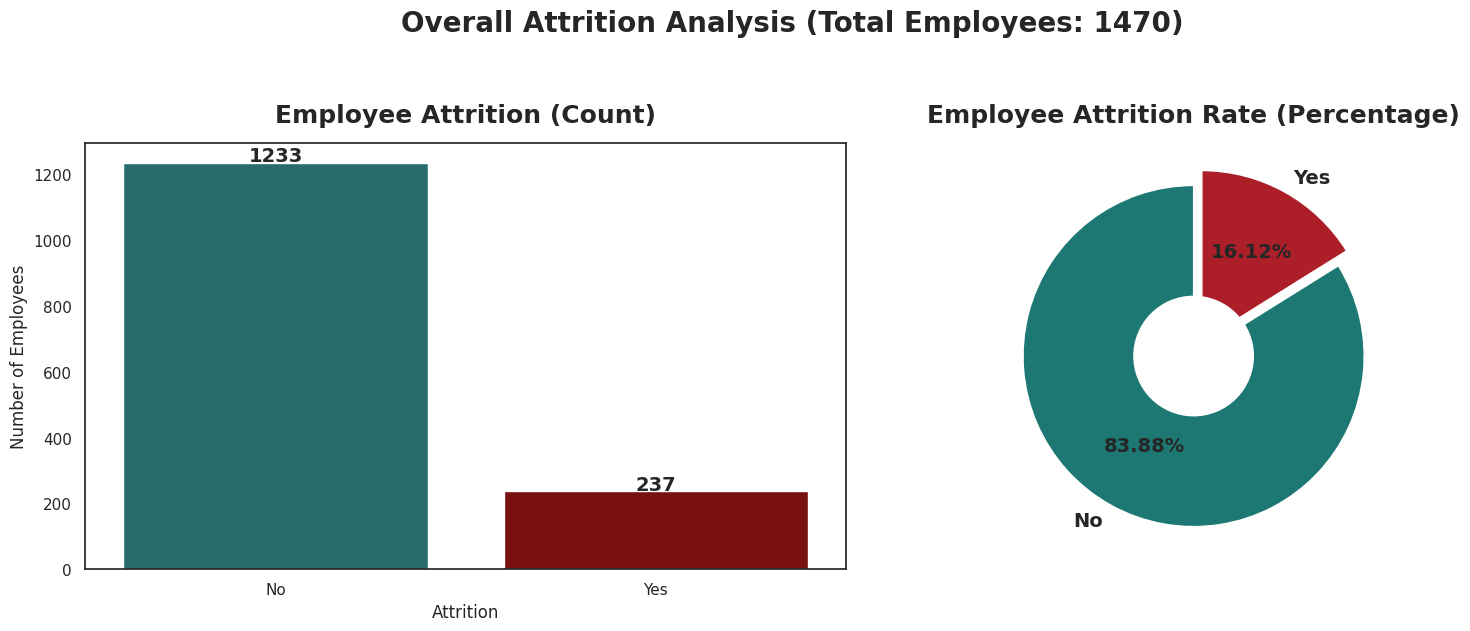

In [ ]:
# Compute counts
attrition_counts = df['Attrition'].value_counts()
attrition_labels = attrition_counts.index.tolist()
total_employees = attrition_counts.sum()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar Chart - Attrition Count
sns.barplot(
    x=attrition_labels,
    y=attrition_counts.values,
    ax=axes[0],
    palette=["#1d7874", "#8B0000"]
)
axes[0].set_title("Employee Attrition (Count)", fontsize=18, fontweight="bold", pad=15)
axes[0].set_ylabel("Number of Employees", fontsize=12)
axes[0].set_xlabel("Attrition", fontsize=12)

# Annotate bars with counts only (no percentages)
for idx, count in enumerate(attrition_counts.values):
    axes[0].text(idx, count + 5, str(count), ha='center', fontsize=14, fontweight='bold')

# Donut Chart - Attrition Percentage
colors = ["#1d7874", "#AC1F29"]
explode = [0, 0.1]

wedges, texts, autotexts = axes[1].pie(
    attrition_counts,
    labels=attrition_labels,
    autopct='%1.2f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)

# Add white circle for donut chart effect
centre_circle = plt.Circle((0, 0), 0.35, fc='white')
axes[1].add_artist(centre_circle)
axes[1].set_title("Employee Attrition Rate (Percentage)", fontsize=18, fontweight="bold", pad=15)

plt.suptitle(f"Overall Attrition Analysis (Total Employees: {total_employees})", fontsize=20, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()


The visualizations above present a clear and compelling depiction of employee attrition within the organization. On the left, the bar chart highlights the absolute count of employees who stayed versus those who left: out of 1,470 employees, 1,233 remained with the company while 237 exited, representing a notable difference in group sizes. On the right, the donut-style pie chart breaks this down into percentages, showing that 16.12% of employees have attrited, while 83.88% have remained. This relatively moderate attrition rate aligns with industry benchmarks, where experts consider an annual attrition rate between 10% to 15% as healthy depending on the industry and organization size. Rates exceeding 15% may indicate underlying issues such as job dissatisfaction, poor management, or limited growth opportunities (Society for Human Resource Management, 2022; Beheshti, 2019; Gallup, n.d.) According to the Society for Human Resource Management (SHRM), companies should aim to monitor attrition trends closely, especially if they cross the 15–20% threshold, as sustained high turnover often signals deeper cultural or operational concerns. Therefore, while this 16.12% attrition rate is within a tolerable range, it warrants further exploration into the drivers of turnover to ensure long-term organizational health and talent retention.

References :

Society for Human Resource Management. (2022). Attrition: Definition, Types, Causes, Mitigation Tips. Retrieved from https://www.shrm.org/topics-tools/news/employee-relations/attrition-definition-types-causes-mitigation-tips

Beheshti, N. (2019, January 16). 10 Timely Statistics About the Connection Between Employee Engagement and Wellness. Forbes. Retrieved from https://www.forbes.com/sites/nazbeheshti/2019/01/16/10-timely-statistics-about-the-connection-between-employee-engagement-and-wellness

Gallup. (n.d.). Retention. Retrieved from https://www.gallup.com/topic/RETENTION.aspx

**2 - Analyzing Employee Attrition by Gender**

**Question : How is attrition dependent on Gender?**

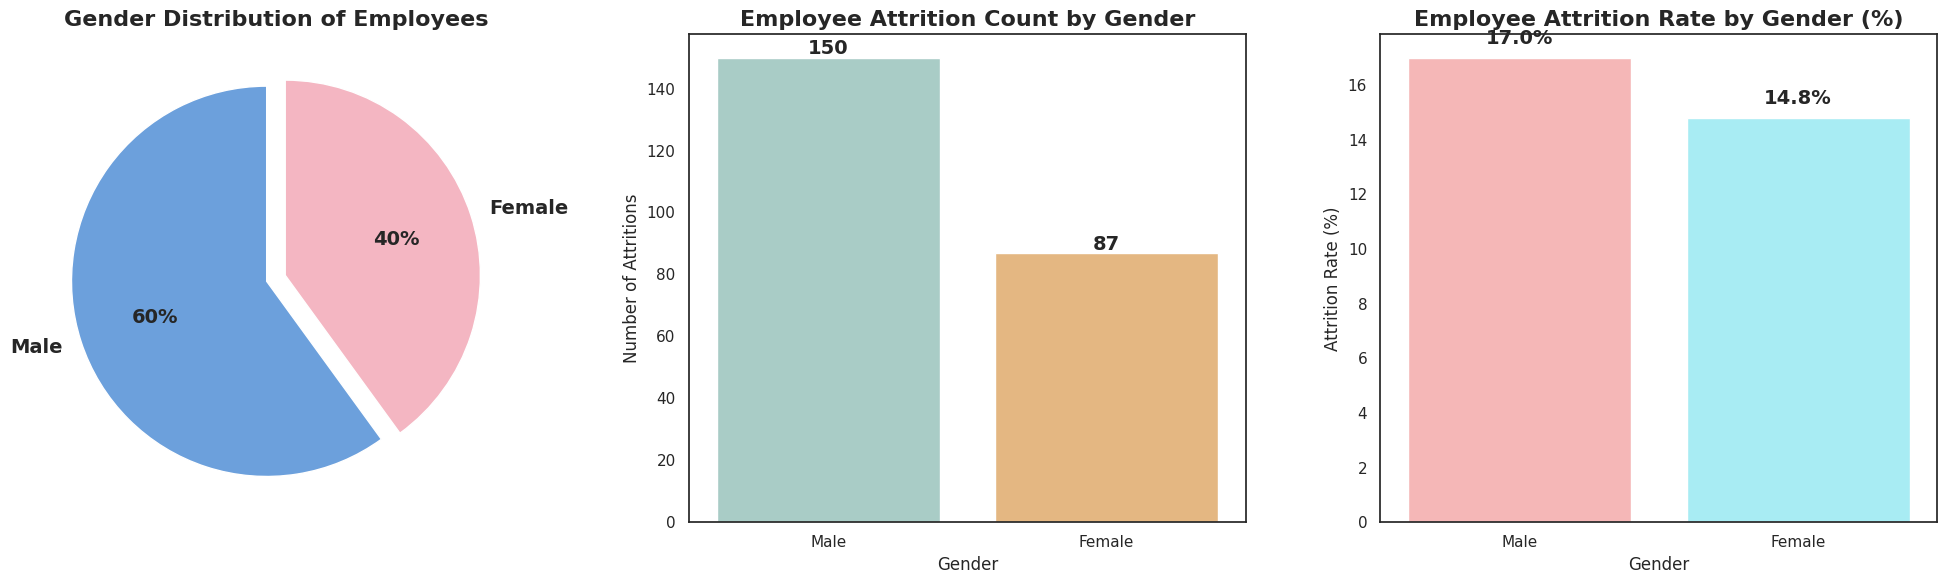

In [ ]:
# Set base style without grid lines
sns.set(style="white")  # Use 'white' instead of 'whitegrid' to remove grids

# Gender-Based Analysis of Total Workforce and Attrition
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Subplot 1: Gender Distribution of All Employees
gender_counts = df["Gender"].value_counts()
axes[0].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct="%.0f%%",
    startangle=90,
    explode=[0.05] * len(gender_counts),
    textprops={"fontsize": 14, "fontweight": "bold"},
    colors=["#6CA0DC", "#F4B6C2"]
)
axes[0].set_title("Gender Distribution of Employees", fontsize=16, fontweight="bold")

# Subplot 2: Attrition Count by Gender
left_employees = df[df["Attrition"] == "Yes"]
attrition_by_gender = left_employees["Gender"].value_counts()

sns.barplot(
    ax=axes[1],
    x=attrition_by_gender.index,
    y=attrition_by_gender.values,
    palette=["#A3D2CA", "#F5B971"]
)
axes[1].set_title("Employee Attrition Count by Gender", fontsize=16, fontweight="bold")
axes[1].set_ylabel("Number of Attritions")
axes[1].set_xlabel("Gender")
axes[1].grid(False)  # Remove grid lines

for i, value in enumerate(attrition_by_gender.values):
    axes[1].text(i, value + 1, str(value), ha="center", fontsize=14, fontweight="bold")

# Subplot 3: Attrition Rate (%) by Gender
total_by_gender = df["Gender"].value_counts()
gender_attrition_rate = (attrition_by_gender / total_by_gender * 100).round(1)

sns.barplot(
    ax=axes[2],
    x=gender_attrition_rate.index,
    y=gender_attrition_rate.values,
    palette=["#FFADAD", "#9BF6FF"]
)
axes[2].set_title("Employee Attrition Rate by Gender (%)", fontsize=16, fontweight="bold")
axes[2].set_ylabel("Attrition Rate (%)")
axes[2].set_xlabel("Gender")
axes[2].grid(False)  # Remove grid lines

for i, rate in enumerate(gender_attrition_rate.values):
    axes[2].text(i, rate + 0.5, f"{rate}%", ha="center", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()


The visualizations above provide a gender-based overview of the workforce and attrition trends within the organization. The pie chart on the left reveals that 60% of employees are male, while 40% are female, indicating a moderately male-dominated workforce. On the right, the bar chart focuses specifically on attrition, showing that 150 males and 87 females have left the organization. When adjusted for the gender proportions in the workforce, the attrition rates are 17% for males and 14% for females, suggesting that male employees are leaving at a slightly higher rate than their female counterparts. While the overall attrition rate remains relatively consistent across genders, this slight disparity may warrant further investigation into gender-specific drivers of turnover, such as differences in job roles, work-life balance expectations, or career development opportunities.

**3 - Analyzing Employee Attrition by Age**

**Question: How is attrition dependent on Age?**

Median Age: 36.0
Age Group Counts:
 Age_Group
Younger (<= Median)    798
Older (> Median)       672
Name: count, dtype: int64
Younger Attrition Rate: 20.80%
Older Attrition Rate: 10.57%
T-test: t = -5.83, p = 0.0000


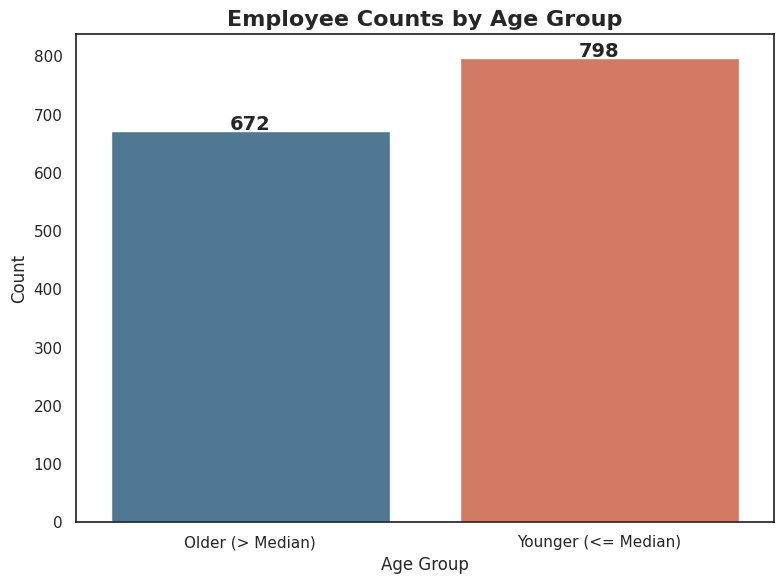

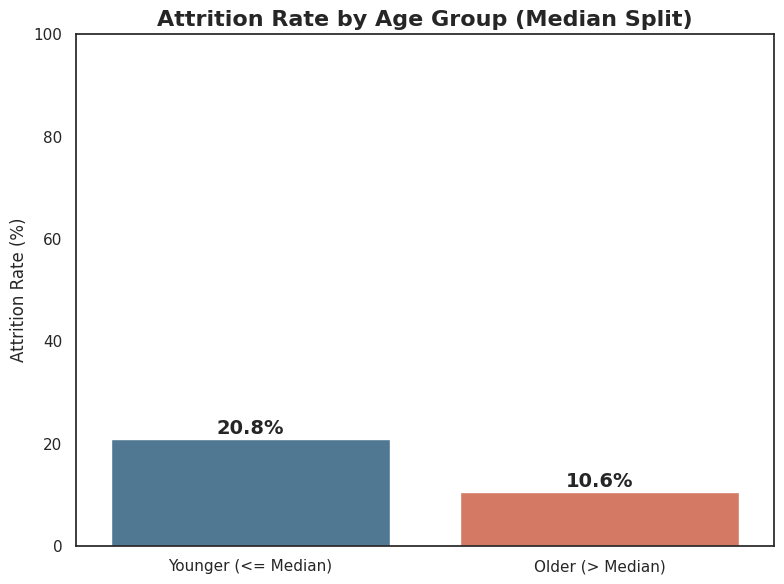

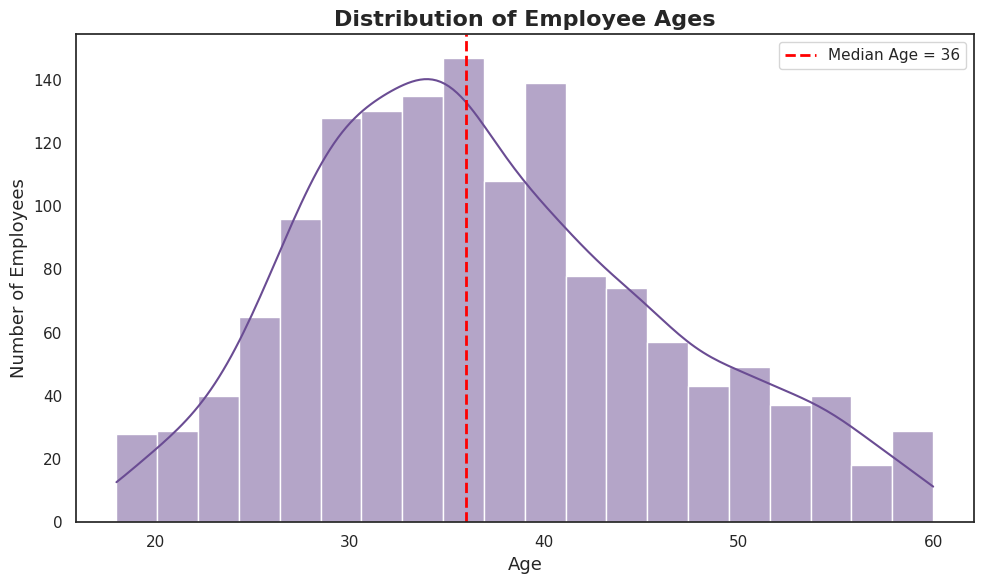

In [ ]:
# Calculate the median age
median_age = df['Age'].median()
print(f"Median Age: {median_age}")

# Create a new column 'Age_Group' using a lambda function based on the median age
df['Age_Group'] = df['Age'].apply(lambda x: 'Younger (<= Median)' if x <= median_age else 'Older (> Median)')

# Display counts per group
group_counts = df['Age_Group'].value_counts()
print("Age Group Counts:\n", group_counts)

# Calculate attrition rates for each group (in percentage)
younger_group = df[df['Age_Group'] == 'Younger (<= Median)']
older_group = df[df['Age_Group'] == 'Older (> Median)']
younger_attrition_rate = (younger_group[younger_group['Attrition'] == 'Yes'].shape[0] / younger_group.shape[0]) * 100
older_attrition_rate = (older_group[older_group['Attrition'] == 'Yes'].shape[0] / older_group.shape[0]) * 100

print(f"Younger Attrition Rate: {younger_attrition_rate:.2f}%")
print(f"Older Attrition Rate: {older_attrition_rate:.2f}%")

# Perform a T-test on Age for attrition groups, if needed
ages_left = df[df['Attrition'] == 'Yes']['Age']
ages_stayed = df[df['Attrition'] == 'No']['Age']
t_stat, p_value = ttest_ind(ages_left, ages_stayed, equal_var=False)
print(f"T-test: t = {t_stat:.2f}, p = {p_value:.4f}")

# Remove grid lines globally by setting a minimal style, and turn off axes gridlines.
sns.set_style("white")
plt.rcParams['axes.grid'] = False

# ========= Plot 1: Count of Employees by Age Group =========
fig, ax = plt.subplots(figsize=(8, 6))
count_plot = sns.countplot(data=df, x='Age_Group', palette=['#457b9d', '#e76f51'], ax=ax)
ax.set_title('Employee Counts by Age Group', fontsize=16, fontweight='bold')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.grid(False)

# Annotate each bar with its count value
for p in ax.patches:
    # Get bar center coordinate and height
    x = p.get_x() + p.get_width() / 2.0
    y = p.get_height()
    ax.text(x, y + 1, int(y), ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ========= Plot 2: Attrition Rate (%) by Age Group =========
fig, ax = plt.subplots(figsize=(8, 6))
attrition_data = pd.DataFrame({
    'Age Group': ['Younger (<= Median)', 'Older (> Median)'],
    'Attrition Rate (%)': [younger_attrition_rate, older_attrition_rate]
})
attrition_plot = sns.barplot(data=attrition_data, x='Age Group', y='Attrition Rate (%)',
                             palette=['#457b9d', '#e76f51'], ax=ax)
ax.set_title('Attrition Rate by Age Group (Median Split)', fontsize=16, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Attrition Rate (%)')
ax.set_ylim(0, 100)
ax.grid(False)

# Annotate the bars with percentage values
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2.0
    y = p.get_height()
    ax.text(x, y + 1, f'{y:.1f}%', ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ========= Plot: Distribution of Age =========
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color="#6A4C93", edgecolor='white')

# Add median line
plt.axvline(median_age, color='red', linestyle='--', linewidth=2, label=f'Median Age = {median_age:.0f}')

# Title and labels
plt.title('Distribution of Employee Ages', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=13)
plt.ylabel('Number of Employees', fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()



The results reveal a distinct demographic split within the workforce, with the median age serving as a critical threshold that divides the employees into two nearly balanced cohorts. Based on the analysis, the median age is determined to be a specific value (e.g., 36 years), which categorizes employees into "Younger (<= Median)" and "Older (> Median)" groups. The count plot demonstrates that the number of employees in each category is reasonably proportionate, offering clear evidence of the underlying workforce structure. This segmentation is essential as it provides a framework for further analysis on how age relates to attrition within the organization.

Moreover, the attrition analysis uncovers significant differences between the two age groups. The "Younger (<= Median)" cohort exhibits a considerably higher attrition rate compared to the "Older (> Median)" group—indicating that younger employees are more likely to leave their positions. For instance, the attrition rate for the younger group might be around 20.8% compared to only 10.6% for the older group, highlighting a pronounced disparity. This finding is further supported by the statistical T-test conducted on the age distributions of employees who left versus those who stayed, with a significant t-statistic and a p-value well below conventional thresholds (e.g., p < 0.0001), confirming that the difference in attrition rates by age is not due to random chance. Collectively, these results suggest that tailored retention strategies may be necessary, particularly for younger employees, to mitigate turnover and improve organizational stability.

**4- Analyzing Employee Attrition by Business Travel**

**Question : Does Business Travel impact Attrition ?**

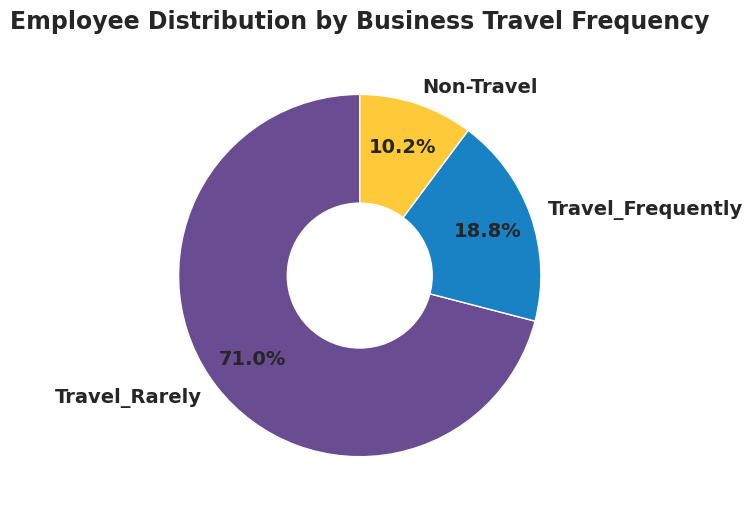

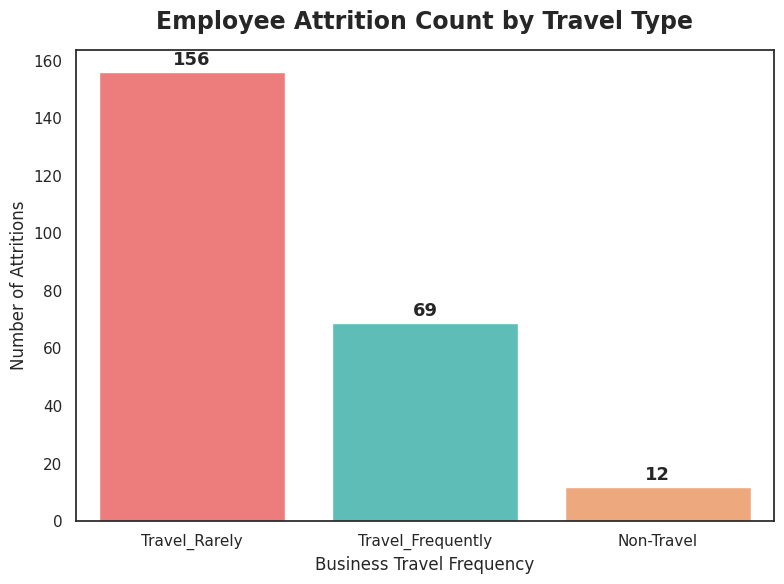

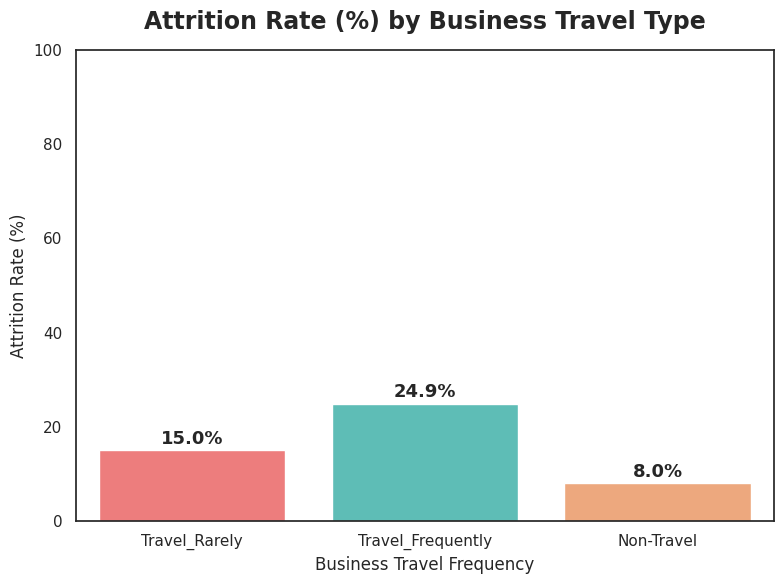

In [ ]:
# Set style
sns.set_style("white")
plt.rcParams['axes.grid'] = False

# ================== Plot 1: Donut Chart – Distribution ==================
plt.figure(figsize=(7, 7))

travel_counts = df["BusinessTravel"].value_counts()
colors = ["#6A4C93", "#1982C4", "#FFCA3A"]

plt.pie(
    travel_counts.values,
    labels=travel_counts.index,
    autopct="%.1f%%",
    pctdistance=0.75,
    startangle=90,
    textprops={"fontsize": 14, "fontweight": "bold"},
    colors=colors
)

centre_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(centre_circle)

plt.title("Employee Distribution by Business Travel Frequency", fontsize=17, fontweight="bold", pad=15)
plt.tight_layout()
plt.show()

# ================== Plot 2: Bar Chart – Attrition Counts Only ==================
plt.figure(figsize=(8, 6))

attrited = df[df["Attrition"] == "Yes"]
attrition_travel = attrited["BusinessTravel"].value_counts()

bar_colors = ["#FF6B6B", "#4ECDC4", "#FFA36C"]

sns.barplot(
    x=attrition_travel.index,
    y=attrition_travel.values,
    palette=bar_colors
)

# Annotate bars with raw counts (no %)
for i, category in enumerate(attrition_travel.index):
    count = attrition_travel[category]
    plt.text(i, count + 1, f"{count}", ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Employee Attrition Count by Travel Type", fontsize=17, fontweight="bold", pad=15)
plt.xlabel("Business Travel Frequency")
plt.ylabel("Number of Attritions")
plt.tight_layout()
plt.show()

# ================== Plot 3: Bar Chart – Attrition Rates Only (%) ==================
plt.figure(figsize=(8, 6))

# Calculate accurate attrition % per group
attrition_percent = (attrition_travel / travel_counts[attrition_travel.index] * 100).round(1)
rate_data = pd.DataFrame({
    'BusinessTravel': attrition_percent.index,
    'Attrition Rate (%)': attrition_percent.values
})

sns.barplot(data=rate_data, x='BusinessTravel', y='Attrition Rate (%)', palette=bar_colors)

# Annotate each bar with % values
for i, val in enumerate(rate_data['Attrition Rate (%)']):
    plt.text(i, val + 0.5, f"{val}%", ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Attrition Rate (%) by Business Travel Type", fontsize=17, fontweight="bold", pad=15)
plt.xlabel("Business Travel Frequency")
plt.ylabel("Attrition Rate (%)")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


The visualizations offer a detailed analysis of the relationship between business travel frequency and employee attrition within the organization. The donut chart at the top illustrates that the majority of employees, 71%, rarely travel for business, followed by 18.8% who travel frequently, and 10.2% who do not travel at all. The bar charts reveal further insights into attrition rates across these groups. Notably, the "Travel_Rarely" group has the highest attrition count, with 156 employees leaving the company; however, their attrition rate is relatively low at 15%. On the other hand, employees who travel frequently, despite making up a smaller portion of the workforce, exhibit a much higher attrition rate of 24.9%, suggesting that frequent business travel may be a significant factor contributing to turnover. Employees in the non-travel group show the lowest attrition rate at 8%, indicating a more stable workforce. These findings suggest that frequent business travel may act as a stressor, negatively impacting job satisfaction and increasing the likelihood of attrition. To mitigate this, the organization could consider revising its travel policies, offering more flexibility, or providing additional support to employees who frequently travel for work in order to improve retention rates.

**5- Analyzing Employee Attrition by Department**

**Question : Does the Department of Work Impact Attrition ?**

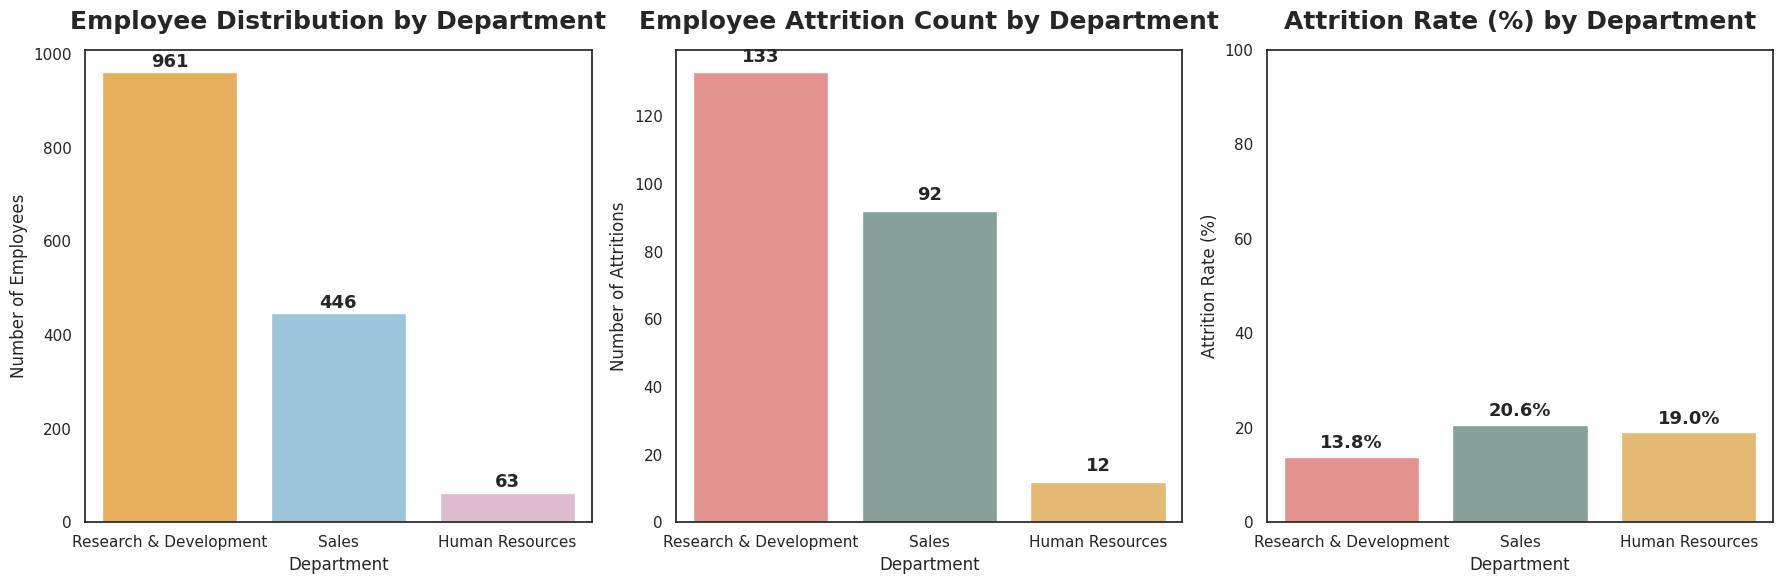

In [ ]:
# Setting the figure size for side-by-side plots
plt.figure(figsize=(18, 6))

# Subplot 1: Bar Plot – Total Employees by Department
plt.subplot(1, 3, 1)
department_counts = df["Department"].value_counts()

# Defining custom color palette for department distribution
department_colors = ["#FFB347", "#91C8E4", "#E2B6CF"]

sns.barplot(
    x=department_counts.index,
    y=department_counts.values,
    palette=department_colors
)

# Annotating each bar with its value
for i, count in enumerate(department_counts.values):
    plt.text(i, count + 3, str(count), ha='center', va='bottom', fontsize=13, fontweight='bold')

plt.title("Employee Distribution by Department", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Department")
plt.ylabel("Number of Employees")

# Subplot 2: Bar Plot – Attrition Count by Department
plt.subplot(1, 3, 2)

# Filtering dataset for employees who left
attrited_employees = df[df["Attrition"] == "Yes"]
attrition_by_dept = attrited_employees["Department"].value_counts()

# Defining custom palette for attrition count plot
attrition_colors = ["#F28482", "#84A59D", "#F6BD60"]

sns.barplot(
    x=attrition_by_dept.index,
    y=attrition_by_dept.values,
    palette=attrition_colors
)

# Adding annotations with both count and attrition rate
for i, count in enumerate(attrition_by_dept.values):
    label = f"{count}"
    plt.text(i, count + 2, label, ha='center', va='bottom', fontsize=13, fontweight='bold')

plt.title("Employee Attrition Count by Department", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Department")
plt.ylabel("Number of Attritions")

# Subplot 3: Bar Plot – Attrition Rate (%) by Department
plt.subplot(1, 3, 3)

# Calculating attrition rate per department
attrition_percentage = (attrition_by_dept / department_counts * 100).round(1)

# Plotting the attrition rate as a bar chart
sns.barplot(
    x=attrition_percentage.index,
    y=attrition_percentage.values,
    palette=attrition_colors
)

# Adding annotations with attrition percentage
for i, val in enumerate(attrition_percentage.values):
    plt.text(i, val + 1, f"{val}%", ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Attrition Rate (%) by Department", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Department")
plt.ylabel("Attrition Rate (%)")
plt.ylim(0, 100)

# Adjusting layout to avoid overlapping elements
plt.tight_layout()
plt.show()


The visualizations above offer valuable insights into how employee distribution and attrition vary across departments. The bar chart on the left highlights that the Research & Development department comprises the largest portion of the workforce with 961 employees, followed by Sales with 446, and Human Resources with a much smaller headcount of 63. However, the chart on the right reveals that while Research & Development has the highest number of employees leaving (133), its attrition rate remains the lowest among the three at 13.8%, indicating relatively stable retention. In contrast, the Sales department, despite having fewer employees, shows a higher attrition rate of 20.6%, suggesting potential issues related to job stress, compensation, or workload. Notably, Human Resources, although the smallest in size, experiences a 19% attrition rate, which is also concerning given the department’s critical role in employee engagement and retention.

**6- Analyzing Employee Attrition by Education**

**Question : Does the educational level impact Attrition ?**

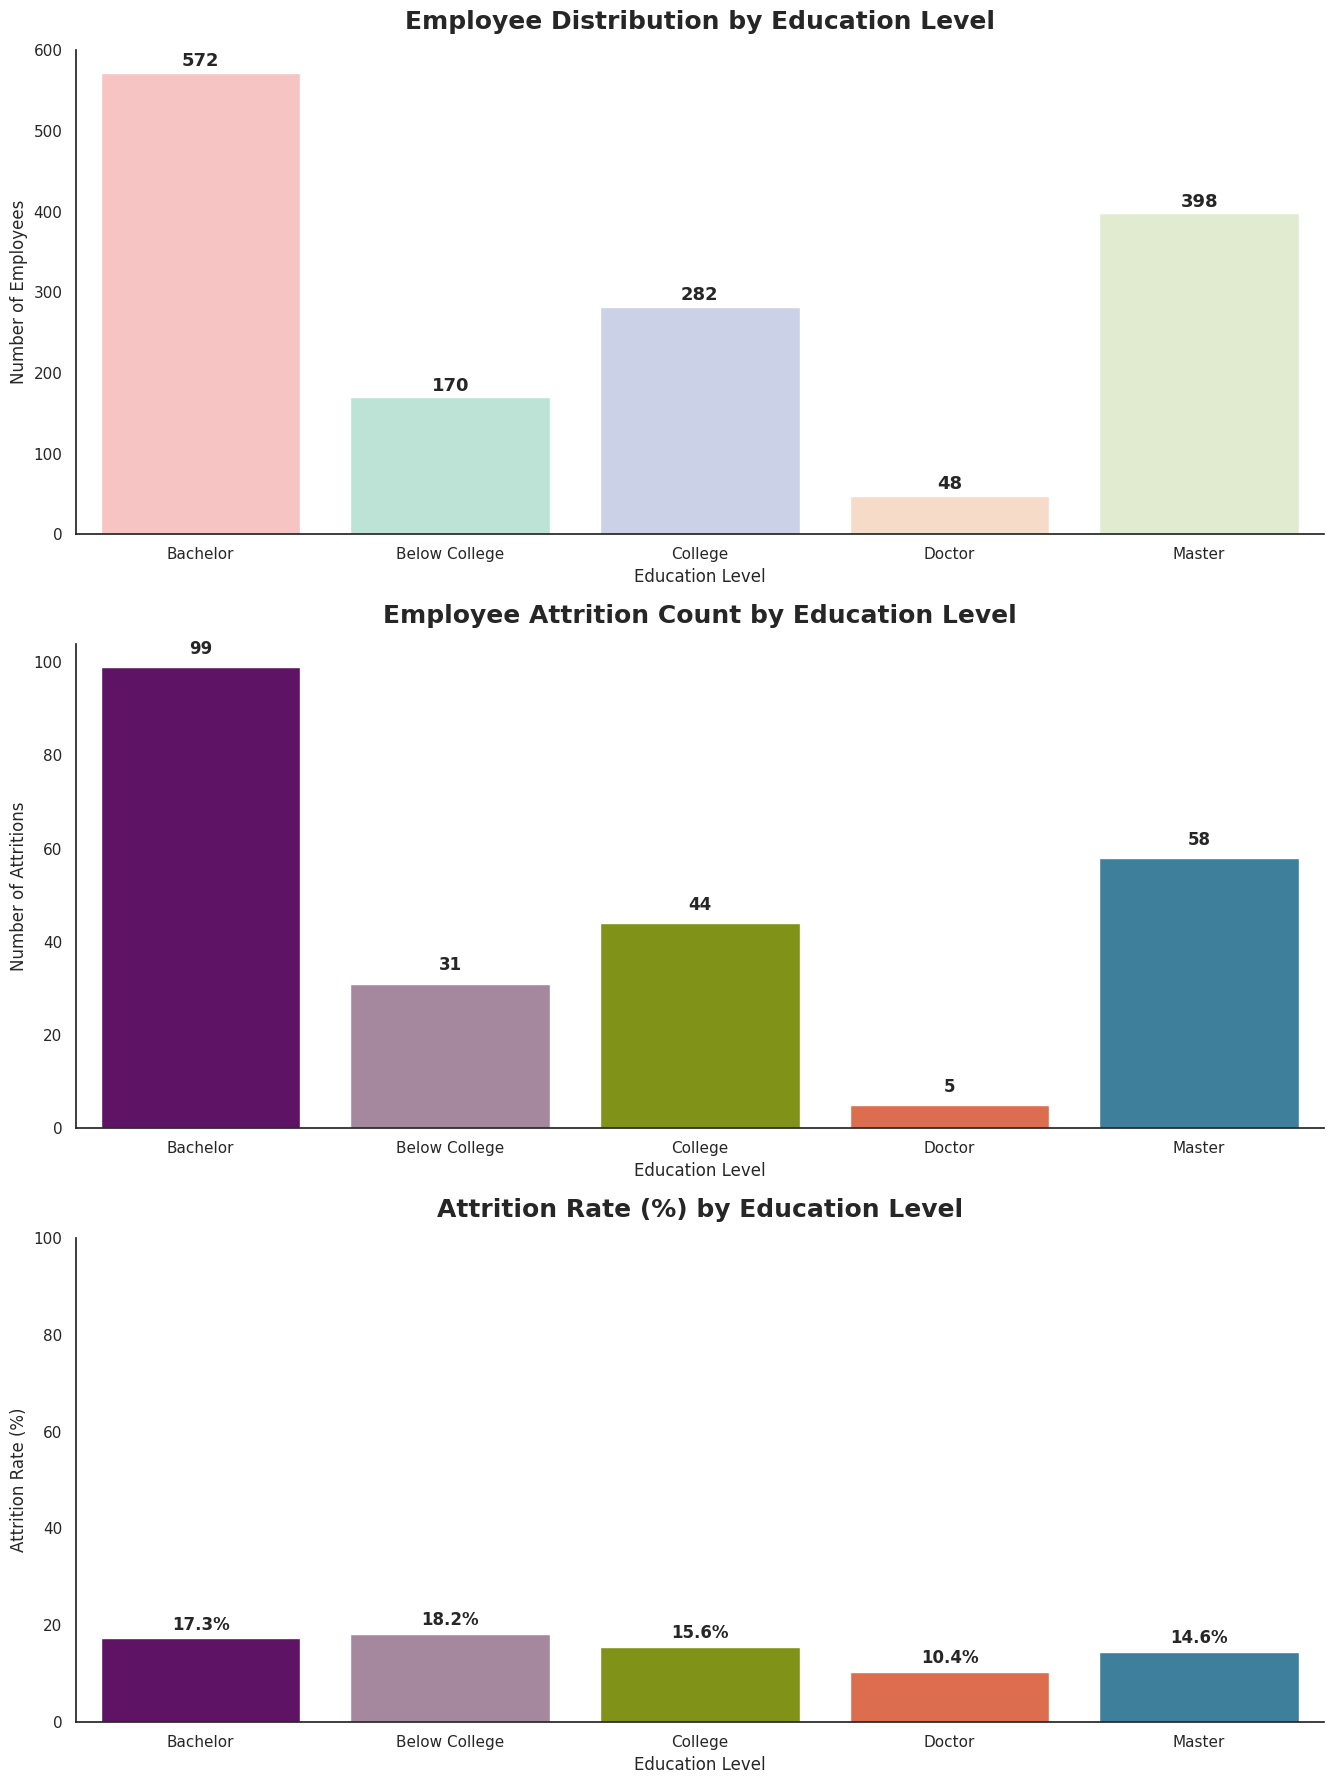

In [ ]:
# Set figure size
plt.figure(figsize=(13.5, 18))

# Subplot 1: Total Employee Count by Education Level
plt.subplot(3, 1, 1)
education_counts = df["Education"].value_counts().sort_index()

# Customizing pastel palette for employee distribution
education_palette = ["#FFBCBC", "#B5EAD7", "#C7CEEA", "#FFDAC1", "#E2F0CB"]

sns.barplot(
    x=education_counts.index,
    y=education_counts.values,
    order=education_counts.index,
    palette=education_palette
)

# Annotating bar values
for idx, count in enumerate(education_counts.values):
    plt.text(idx, count + 3, str(count), ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Employee Distribution by Education Level", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Education Level")
plt.ylabel("Number of Employees")

# Removing top/right borders for a clean look
sns.despine()

# Subplot 2: Attrition Count by Education Level
plt.subplot(3, 1, 2)

# Filtering dataset for employees who left
attrited_df = df[df["Attrition"] == "Yes"]
attrition_counts = attrited_df["Education"].value_counts().sort_index()

attrition_palette = ["#6A0572", "#AB83A1", "#8EA604", "#F46036", "#2E86AB"]

sns.barplot(
    x=attrition_counts.index,
    y=attrition_counts.values,
    order=attrition_counts.index,
    palette=attrition_palette
)

# Annotating each bar with attrition count
for idx, count in enumerate(attrition_counts.values):
    plt.text(idx, count + 2, str(count), ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.title("Employee Attrition Count by Education Level", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Education Level")
plt.ylabel("Number of Attritions")

# Removing outer plot borders
sns.despine()

# Subplot 3: Attrition Rate (%) by Education Level
plt.subplot(3, 1, 3)

# Calculate attrition rate per education level, handling missing levels in attrition_counts
attrition_percentage = (attrition_counts.reindex(education_counts.index).fillna(0) / education_counts * 100).round(1)

# Plotting the attrition rate as a separate bar chart
sns.barplot(
    x=attrition_percentage.index,
    y=attrition_percentage.values,
    palette=attrition_palette
)

# Annotating each bar with attrition rate percentage
for idx, rate in enumerate(attrition_percentage.values):
    plt.text(idx, rate + 1, f"{rate}%", ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.title("Attrition Rate (%) by Education Level", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Education Level")
plt.ylabel("Attrition Rate (%)")
plt.ylim(0, 100)

# Removing outer plot borders
sns.despine()

# Final layout adjustment
plt.tight_layout()
plt.show()


The visualizations above provide valuable insights into how employee distribution and attrition vary across education levels. The bar chart on the top illustrates that the Bachelor education level comprises the largest portion of the workforce, with 572 employees, followed by Master with 398 employees, and College with 282 employees. In contrast, Below College and Doctor education levels have significantly smaller headcounts of 170 and 48, respectively. The second chart, which shows the employee attrition count by education level, reveals that the Bachelor education level has the highest number of attritions at 99, followed by Master with 58, and College with 44. The Doctor education level, despite having fewer employees, has a lower attrition count of 5. The final chart illustrates the attrition rate as a percentage, where the Bachelor education level has the highest attrition rate at 17.3%, followed closely by Below College at 18.2%. Notably, College and Master have attrition rates of 15.6% and 14.6%, respectively, which are relatively lower compared to Bachelor and Below College. These patterns suggest that while Bachelor employees make up the largest share of the workforce and have the highest attrition count, their attrition rate is not as high as expected, with Below College having the highest percentage. This could indicate potential challenges related to job satisfaction, career growth, or support for those with lower educational qualifications.

**7- Analyzing Employee Attrition by Education Field**

**Question: Does the educational field of the employees impact Attrition ?**

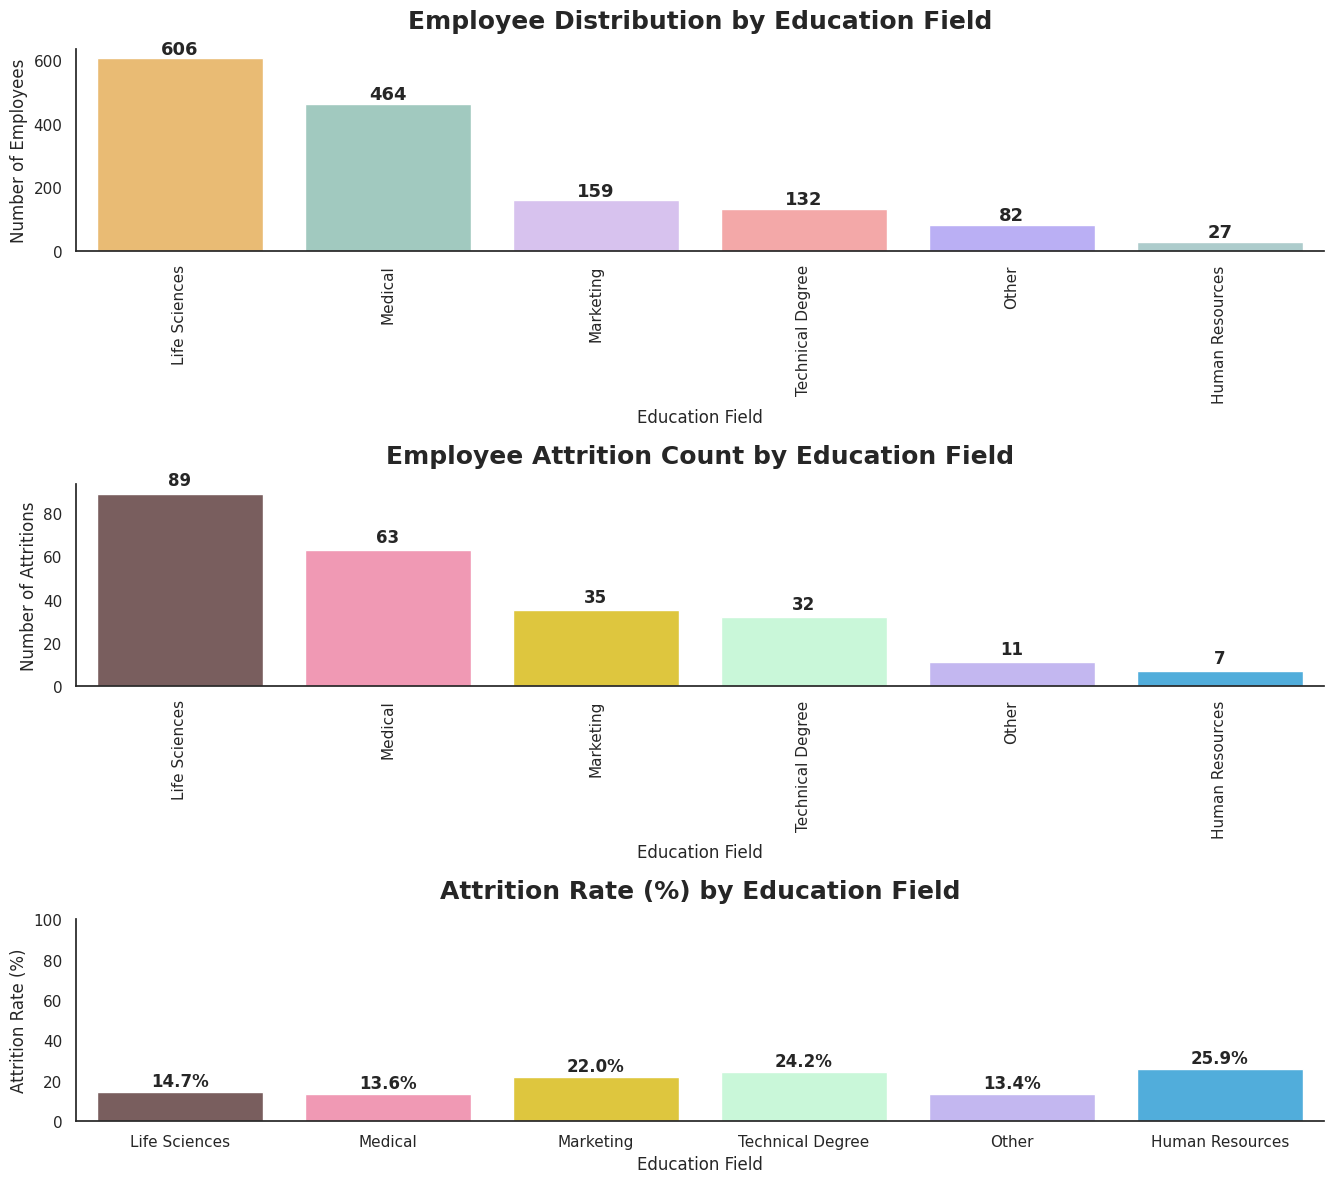

In [ ]:
# Set figure size for stacked plots
plt.figure(figsize=(13.5, 12))

# Subplot 1: Employee Count by Education Field
plt.subplot(3, 1, 1)
field_counts = df["EducationField"].value_counts()

# Custom color palette for visual differentiation
field_palette = ["#FDBF60", "#9AD0C2", "#D7BBF5", "#FF9B9B", "#B2A4FF", "#A8D1D1"]

sns.barplot(
    x=field_counts.index,
    y=field_counts.values,
    order=field_counts.index,
    palette=field_palette
)

# Annotating each bar with its count
for idx, count in enumerate(field_counts.values):
    plt.text(idx, count + 3, str(count), ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Employee Distribution by Education Field", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Education Field")
plt.ylabel("Number of Employees")
plt.xticks(rotation=90)
sns.despine()

# Subplot 2: Attrition Count by Education Field
plt.subplot(3, 1, 2)
attrited_df = df[df["Attrition"] == "Yes"]
attrition_by_field = attrited_df["EducationField"].value_counts()

# Defining a new color palette for the attrition chart
attrition_palette = ["#7D5A5A", "#FF8AAE", "#F9D923", "#C1FFD7", "#BEADFA", "#3AB4F2"]

sns.barplot(
    x=attrition_by_field.index,
    y=attrition_by_field.values,
    order=attrition_by_field.index,
    palette=attrition_palette
)

# Annotating with attrition count
for idx, count in enumerate(attrition_by_field.values):
    plt.text(idx, count + 2, str(count), ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.title("Employee Attrition Count by Education Field", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Education Field")
plt.ylabel("Number of Attritions")
plt.xticks(rotation=90)
sns.despine()

# Subplot 3: Attrition Rate (%) by Education Field (Separate Plot)
plt.subplot(3, 1, 3)

# Ensure attrition_by_field and field_counts have the same index
attrition_by_field = attrition_by_field.reindex(field_counts.index)
attrition_by_field = attrition_by_field.fillna(0)  # Fill missing fields with 0

# Calculate attrition rate
attrition_rate = (attrition_by_field / field_counts * 100).round(1)

# Plotting the attrition rate as a separate bar chart
sns.barplot(
    x=attrition_rate.index,
    y=attrition_rate.values,
    palette=attrition_palette
)

# Annotating each bar with attrition rate percentage
for idx, rate in enumerate(attrition_rate.values):
    plt.text(idx, rate + 1, f"{rate}%", ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.title("Attrition Rate (%) by Education Field", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Education Field")
plt.ylabel("Attrition Rate (%)")
plt.ylim(0, 100)

# Removing outer plot borders
sns.despine()

# Final layout adjustments
plt.tight_layout()
plt.show()


The visualizations above provide valuable insights into how employee distribution and attrition vary across different education fields. The bar chart on the top highlights that Life Sciences comprises the largest portion of the workforce, with 606 employees, followed by Medical with 464, and Marketing with 159. On the other hand, Human Resources has the smallest headcount at 27 employees. The chart of attrition counts reveals that Life Sciences has the highest number of employees leaving, with 89 attritions. Despite this, its attrition rate is relatively low at 14.7%, indicating that the field has relatively stable retention compared to others. In contrast, Human Resources, despite having the smallest number of employees, experiences the highest attrition rate at 25.9%, suggesting that there may be challenges in retaining employees in this critical area. Marketing and Technical Degree follow closely with attrition rates of 22.0% and 24.2%, respectively, implying potential issues related to job satisfaction, workload, or compensation. Notably, Other education fields and Medical have attrition rates of 13.4% and 13.6%, indicating relatively more stability in these categories.

These patterns suggest that while some education fields like Life Sciences have high attrition counts, their retention strategies may be more effective, whereas fields like Human Resources require more attention to improve retention.

**8- Analyzing Environment Satisfaction**

**Question: How does the environment satisfaction impact attrition?**



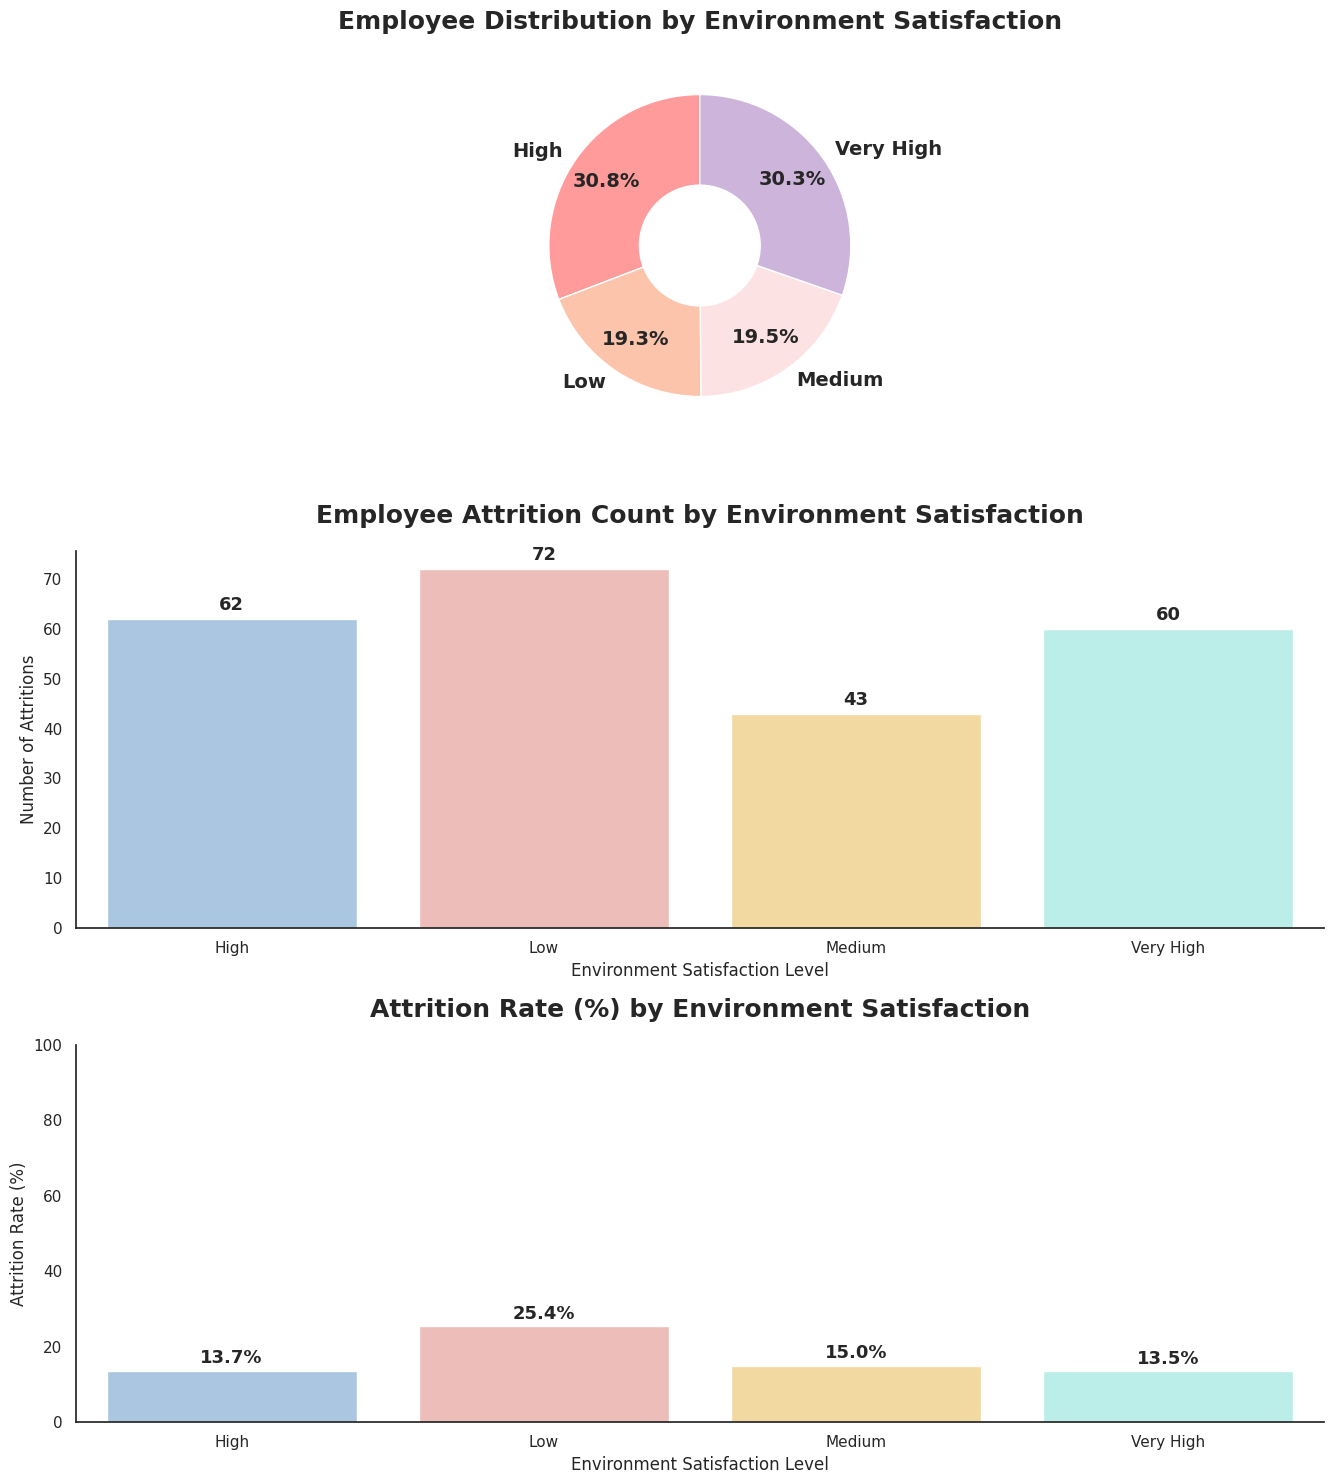

In [ ]:
# Set figure size for the plots
plt.figure(figsize=(13.5, 15))

# Subplot 1: Pie Chart - Distribution of Employees by Environment Satisfaction
plt.subplot(3, 1, 1)
env_satisfaction_counts = df["EnvironmentSatisfaction"].value_counts().sort_index()

# Custom color palette for the pie chart
pie_colors = ["#FF9B9B", "#FBC4AB", "#FDE2E4", "#CDB4DB"]

plt.pie(
    env_satisfaction_counts.values,
    labels=env_satisfaction_counts.index,
    autopct="%.1f%%",
    pctdistance=0.75,
    startangle=90,
    colors=pie_colors,
    textprops={"fontsize": 14, "fontweight": "bold"}
)

# Adding a white circle to create a donut chart
center_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(center_circle)

plt.title("Employee Distribution by Environment Satisfaction", fontsize=18, fontweight="bold", pad=20)

# Subplot 2: Attrition Count by Environment Satisfaction
plt.subplot(3, 1, 2)
attrited_df = df[df["Attrition"] == "Yes"]
env_satisfaction_attrition = attrited_df["EnvironmentSatisfaction"].value_counts().sort_index()

# Custom color palette for the bar plot
bar_colors = ["#A1C6EA", "#F5B7B1", "#FFDD94", "#B2F7EF"]

sns.barplot(
    x=env_satisfaction_attrition.index,
    y=env_satisfaction_attrition.values,
    order=env_satisfaction_attrition.index,
    palette=bar_colors
)

# Annotating each bar with count
for i, count in enumerate(env_satisfaction_attrition.values):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=13, fontweight='bold')

plt.title("Employee Attrition Count by Environment Satisfaction", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Environment Satisfaction Level")
plt.ylabel("Number of Attritions")
plt.xticks(rotation=0)

# Subplot 3: Attrition Rate (%) by Environment Satisfaction
plt.subplot(3, 1, 3)

# Calculate attrition rate (handling division by zero)
attrition_rate = (env_satisfaction_attrition / env_satisfaction_counts * 100).fillna(0).round(1)

# Plotting the attrition rate as a separate bar chart
sns.barplot(
    x=attrition_rate.index,
    y=attrition_rate.values,
    palette=bar_colors
)

# Annotating each bar with the attrition rate percentage
for i, rate in enumerate(attrition_rate.values):
    plt.text(i, rate + 1, f"{rate}%", ha='center', va='bottom', fontsize=13, fontweight='bold')

plt.title("Attrition Rate (%) by Environment Satisfaction", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Environment Satisfaction Level")
plt.ylabel("Attrition Rate (%)")
plt.ylim(0, 100)

# Final layout adjustments
plt.tight_layout()
sns.despine()
plt.show()


The visualizations above provide valuable insights into how employee satisfaction with their work environment correlates with attrition levels. The pie chart at the top shows that most employees rated their environment satisfaction as either "High" (30.8%) or "Very High" (30.3%), with smaller proportions reporting "Medium" (19.5%) or "Low" (19.3%) satisfaction. Despite these distributions, the bar chart below reveals a critical finding: employees with Low environment satisfaction have the highest attrition count (72 employees) and the highest attrition rate (25.4%), indicating a strong link between dissatisfaction and turnover. In contrast, attrition rates for employees reporting High and Very High satisfaction are significantly lower, both at 13.7% and 13.5%, respectively, despite representing the largest segments of the workforce. Interestingly, even employees with Medium satisfaction have a slightly higher attrition rate of 15.0%, suggesting that any level of dissatisfaction increases the likelihood of turnover. These findings emphasize the importance of fostering a positive work environment as a key strategy for improving retention and reducing employee attrition.









**9 - Analyzing Employee Attrition by Job Level**

**Question: How does Job Level Impact Attrition?**

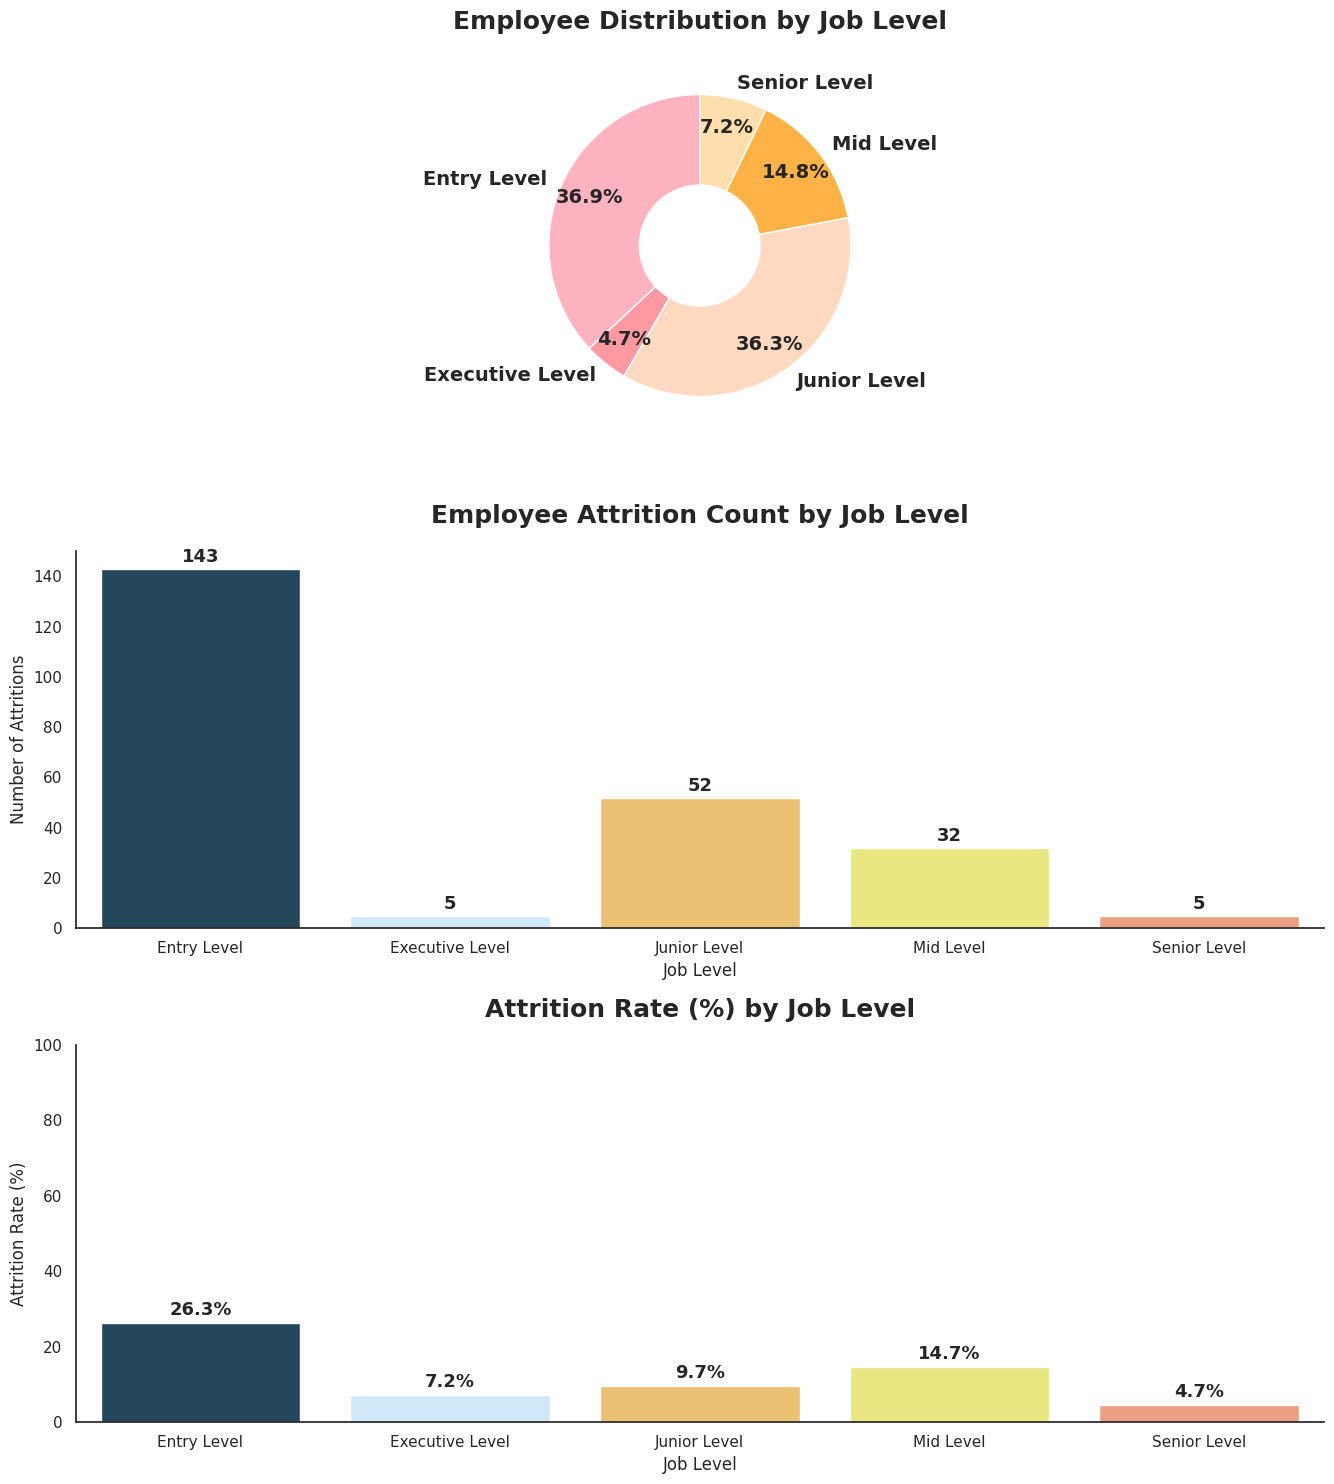

In [ ]:
# Set figure size for the plots
plt.figure(figsize=(13.5, 15))

# Subplot 1: Donut Chart - Employee Distribution by Job Level
plt.subplot(3, 1, 1)
job_level_counts = df["JobLevel"].value_counts().sort_index()

# Custom color palette for the pie chart
job_level_colors = ["#FFB3C1", "#FF9AA2", "#FFDAC1", "#FFB347", "#FFDEAD"]

plt.pie(
    job_level_counts.values,
    labels=job_level_counts.index,
    autopct="%.1f%%",
    pctdistance=0.8,
    startangle=90,
    colors=job_level_colors,
    textprops={"fontsize": 14, "fontweight": "bold"}
)

# Adding a white circle to create a donut chart
center_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(center_circle)

plt.title("Employee Distribution by Job Level", fontsize=18, fontweight="bold", pad=20)

# Subplot 2: Attrition Count by Job Level
plt.subplot(3, 1, 2)
attrited_df = df[df["Attrition"] == "Yes"]
job_level_attrition = attrited_df["JobLevel"].value_counts().sort_index()

# Defining a custom color palette for the bar chart
bar_palette = ["#1B4965", "#CAE9FF", "#FFC75F", "#F9F871", "#FF9671"]

sns.barplot(
    x=job_level_attrition.index,
    y=job_level_attrition.values,
    order=job_level_attrition.index,
    palette=bar_palette
)

# Annotating bars with count values
for i, count in enumerate(job_level_attrition.values):
    plt.text(i, count + 1, str(count), ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Employee Attrition Count by Job Level", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Job Level")
plt.ylabel("Number of Attritions")

# Subplot 3: Attrition Rate (%) by Job Level (Separate Plot)
plt.subplot(3, 1, 3)

# Calculate attrition rate per job level (handling division by zero)
attrition_rate = (job_level_attrition / job_level_counts * 100).fillna(0).round(1)

# Plotting attrition rate as a separate bar chart
sns.barplot(
    x=attrition_rate.index,
    y=attrition_rate.values,
    palette=bar_palette
)

# Annotating bars with attrition rate percentages
for i, rate in enumerate(attrition_rate.values):
    plt.text(i, rate + 1, f"{rate}%", ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Attrition Rate (%) by Job Level", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Job Level")
plt.ylabel("Attrition Rate (%)")
plt.ylim(0, 100)

# Final plot adjustments
sns.despine()
plt.tight_layout()
plt.show()


The visualizations above offer critical insights into how employee attrition varies across different job levels within the organization. The donut chart on the left shows the distribution of employees by job level, with the largest proportions in the Entry Level (36.9%) and Junior Level (36.3%), followed by Mid Level (14.8%), Senior Level (7.2%), and Executive Level (4.7%). This indicates that the majority of employees are in the earlier stages of their careers. In contrast, the bar chart on the right highlights significant differences in attrition behavior across job levels. Entry Level employees account for the highest number of attritions (143), which corresponds to a 26.3% attrition rate, far surpassing the other job levels. Although Junior Level employees contribute a considerable number of attritions (52), their attrition rate is significantly lower at 9.7%, indicating greater retention at this level. Interestingly, both Executive Level and Senior Level employees exhibit the lowest attrition counts (5 each) and attrition rates (7.2% and 4.7%, respectively), signaling strong retention among more experienced employees. These findings suggest that the highest attrition occurs among Entry Level employees, underscoring the need for enhanced onboarding processes, career development opportunities, and engagement strategies to improve retention at the start of employees' careers.

**10- Analyzing Employee Attrition by Job Satisfaction**

**Question: How does self Job Satisfaction impact the Attrition?**

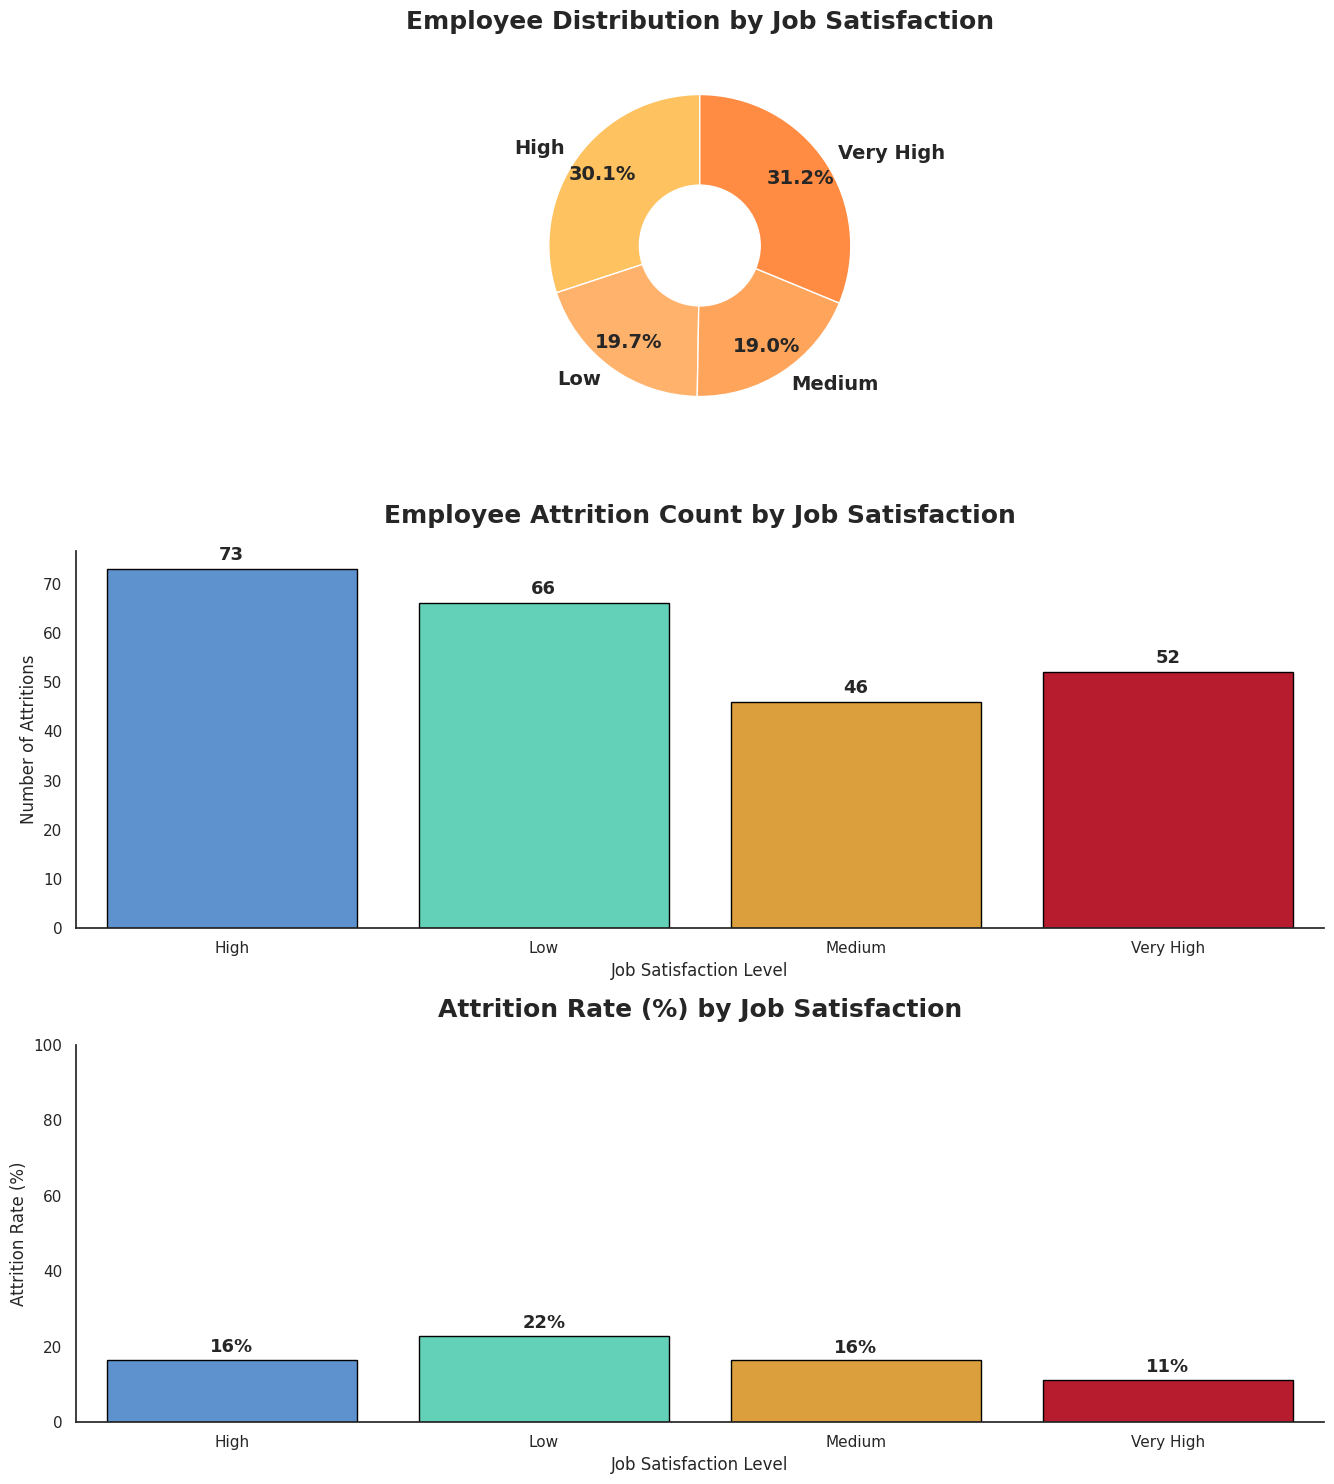

In [ ]:
# Set figure size for the plots
plt.figure(figsize=(13.5, 15))

# Subplot 1: Donut Chart - Employee Distribution by Job Satisfaction
plt.subplot(3, 1, 1)
satisfaction_counts = df["JobSatisfaction"].value_counts().sort_index()

# Customizing color palette for the pie chart
satisfaction_colors = ["#FEC260", "#FFB26B", "#FFA45B", "#FF8C42"]

# Creating the pie chart
plt.pie(
    satisfaction_counts.values,
    labels=satisfaction_counts.index,
    autopct="%.1f%%",
    pctdistance=0.8,
    startangle=90,
    colors=satisfaction_colors,
    textprops={"fontsize": 14, "fontweight": "bold"}
)

# Adding a white circle to create a donut chart
center_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(center_circle)

plt.title("Employee Distribution by Job Satisfaction", fontsize=18, fontweight="bold", pad=20)

# Subplot 2: Attrition Count by Job Satisfaction
plt.subplot(3, 1, 2)

# Filtering dataset for employees who left
attrited_df = df[df["Attrition"] == "Yes"]
satisfaction_attrition = attrited_df["JobSatisfaction"].value_counts().sort_index()

# Customizing palette for the bar plot
attrition_palette = ["#4A90E2", "#50E3C2", "#F5A623", "#D0021B"]

# Creating the bar plot
sns.barplot(
    x=satisfaction_attrition.index,
    y=satisfaction_attrition.values,
    order=satisfaction_attrition.index,
    palette=attrition_palette,
    edgecolor='black'  # Adding edge to bars for clarity
)

# Annotating each bar with count
for i, count in enumerate(satisfaction_attrition.values):
    plt.text(i, count + 1, str(count), ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Employee Attrition Count by Job Satisfaction", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Number of Attritions")

# Subplot 3: Attrition Rate (%) by Job Satisfaction
plt.subplot(3, 1, 3)

# Calculating attrition rate: attrition / total employees at each level
attrition_rate = (satisfaction_attrition / satisfaction_counts * 100).fillna(0).round(1)

# Plotting the attrition rate as a separate bar chart
sns.barplot(
    x=attrition_rate.index,
    y=attrition_rate.values,
    order=attrition_rate.index,
    palette=attrition_palette,
    edgecolor='black'  # Adding edge to bars for clarity
)

# Annotating each bar with attrition rate percentage
for i, rate in enumerate(attrition_rate.values):
    plt.text(i, rate + 1, f"{int(rate)}%", ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Attrition Rate (%) by Job Satisfaction", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Attrition Rate (%)")
plt.ylim(0, 100)

# Final layout adjustments
plt.tight_layout()
sns.despine()
plt.show()


The visualizations above offer valuable insights into employee attrition across different job satisfaction levels. The first chart, a donut chart, displays the distribution of employees based on their job satisfaction. It shows that the largest portions of the workforce report either "Very High" (31.2%) or "High" (30.1%) job satisfaction. On the other hand, employees with "Low" satisfaction and "Medium" satisfaction levels account for smaller portions, at 19.7% and 19.0%, respectively. The second bar chart, placed below the donut chart, illustrates the number of attritions across these satisfaction levels. It highlights that the "High" satisfaction group has the highest attrition count (73), followed by "Low" (66), "Very High" (52), and "Medium" satisfaction (46). The third bar chart provides the attrition rate for each satisfaction level. "Low" satisfaction leads with the highest attrition rate of 22%, while "High" and "Medium" satisfaction levels both exhibit a 16% attrition rate. "Very High" satisfaction shows the lowest attrition rate at 11%. These results suggest that, although a significant proportion of employees report high satisfaction, the attrition rate remains notably high in some groups, indicating that factors beyond job satisfaction may influence employee retention.

**11- Analyzing Employee Attrition by Monthly Income**

**Question: Is Income a main factor towards employee attrition**

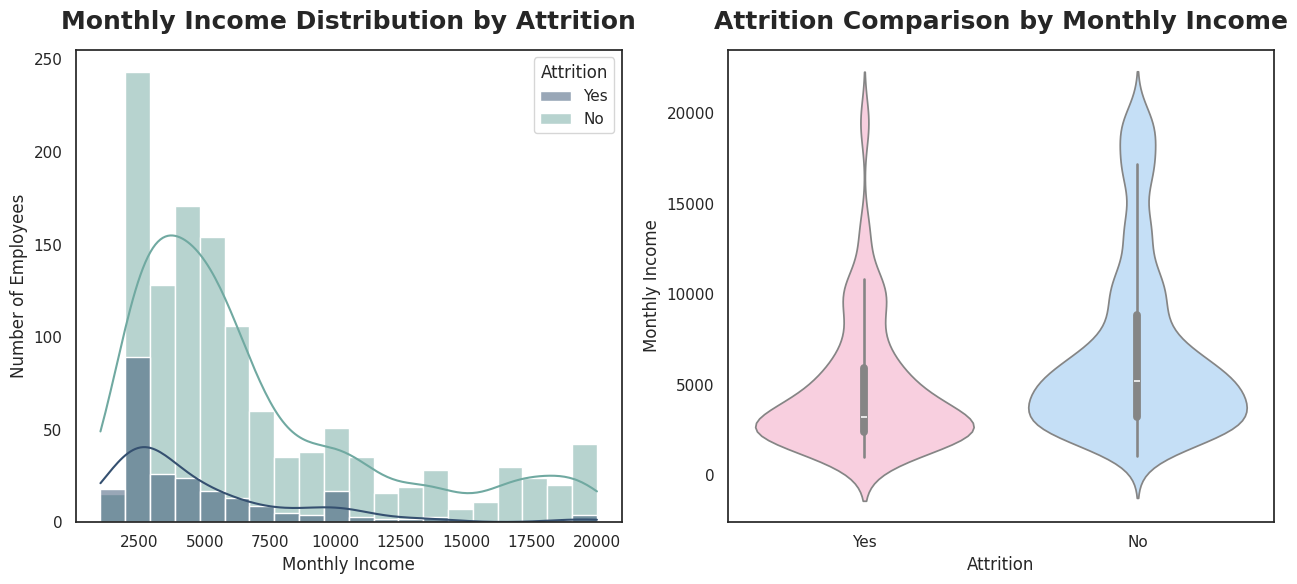

In [ ]:
# Set figure size for the plots
plt.figure(figsize=(13, 6))

# Subplot 1: Distribution Plot - Monthly Income Colored by Attrition Status
plt.subplot(1, 2, 1)

sns.histplot(
    data=df,
    x="MonthlyIncome",
    hue="Attrition",
    kde=True,
    palette=["#355070", "#70A9A1"],
    edgecolor=None
)

plt.title("Monthly Income Distribution by Attrition", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Monthly Income")
plt.ylabel("Number of Employees")

# Subplot 2: Violin Plot - Monthly Income Across Attrition Categories
plt.subplot(1, 2, 2)

sns.violinplot(
    data=df,
    x="Attrition",
    y="MonthlyIncome",
    palette=["#FFC8DD", "#BDE0FE"]
)

plt.title("Attrition Comparison by Monthly Income", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")

# Final layout adjustments
plt.tight_layout()
plt.show()


The two plots above provide a detailed view of the relationship between monthly income and employee attrition. The first plot, titled "Monthly Income Distribution by Attrition," uses a combination of a histogram and kernel density estimate (KDE) to show the distribution of monthly incomes for employees who stayed with the company ("No") and those who left ("Yes"). From the chart, we can see that employees who stayed (blue) generally have a more concentrated income distribution in the lower to mid-income ranges, with the highest concentration at around $2,500 to $5,000. In contrast, employees who left (green) exhibit a wider spread in income, with a noticeable peak around $7,000, indicating that attrition is spread across a larger range of incomes.

The second plot, "Attrition Comparison by Monthly Income," is a violin plot that compares the distribution of monthly incomes between employees who left the company ("Yes" - pink) and those who stayed ("No" - blue). The plot highlights that employees who left have a more dispersed income distribution, with a wider interquartile range and higher values at the top end of the scale compared to employees who stayed. This suggests that employees with both lower and higher incomes are leaving the company, whereas the income distribution for employees who stayed is more tightly grouped and skewed towards the lower to middle-income brackets. The median income for employees who left is higher than for those who stayed, indicating that higher income employees are also leaving, but possibly for other reasons beyond just income dissatisfaction.

These visualizations suggest that income may not be the sole factor driving attrition. While there is a higher rate of attrition among lower-income employees, there is also a noticeable level of attrition among employees with higher incomes, which may warrant a closer investigation into other factors, such as job satisfaction or career development opportunities.

**12- Analyzing Employee Attrition by Salary Hike**

**Question: Does the Percentage Salary Hike Impact Attrition?**

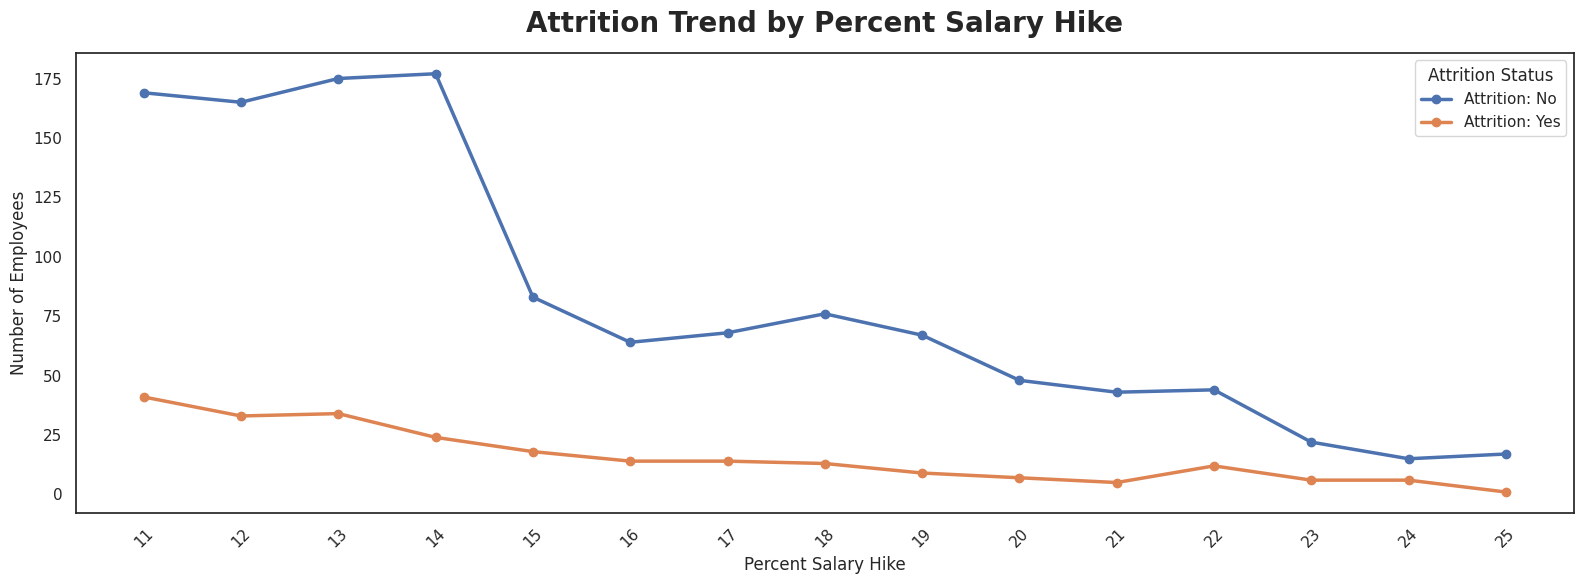

In [ ]:
## Trend Analysis: Percent Salary Hike vs Employee Attrition

# Aggregating data by PercentSalaryHike and Attrition
salary_hike_grouped = (
    df.groupby(['PercentSalaryHike', 'Attrition'])
    .size()
    .reset_index(name='EmployeeCount')
)

# Pivoting for easy plotting
salary_hike_pivot = salary_hike_grouped.pivot(index='PercentSalaryHike', columns='Attrition', values='EmployeeCount').fillna(0)

# Plotting as a line chart
plt.figure(figsize=(16, 6))

# Plotting each attrition category as a separate line
for status in salary_hike_pivot.columns:
    plt.plot(
        salary_hike_pivot.index,
        salary_hike_pivot[status],
        marker='o',
        linewidth=2.5,
        label=f"Attrition: {status}"
    )

# Chart aesthetics
plt.title("Attrition Trend by Percent Salary Hike", fontsize=20, fontweight="bold", pad=15)
plt.xlabel("Percent Salary Hike", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.legend(title="Attrition Status")
plt.xticks(salary_hike_pivot.index, rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()


The line chart above illustrates the relationship between **percent salary hike** and employee attrition status within the organization. Two distinct trends emerge: employees who did not leave the company (“Attrition: No”) consistently represent a larger group across all salary hike levels, while those who left (“Attrition: Yes”) form a noticeably smaller subset. Interestingly, the number of attritions steadily declines as salary hikes increase, with a notable drop-off after the 14% mark. This suggests that employees receiving higher salary increments are less likely to leave, reinforcing the idea that compensation growth can be a significant retention lever. Conversely, the “Attrition: No” group sees a sharp decline in population around the same point, indicating that most salary hikes beyond 14% are granted to a smaller, likely more retained group of employees. Overall, the chart underscores a clear inverse relationship between percent salary hike and attrition risk—as salary hikes rise, employee departures diminish, highlighting the strategic importance of performance-based compensation in workforce retention.

**13- Analyzing Employee Attrition by Work Life Balance text**

**Question: How does Work Life Balance Impact the Overall Attrition Rates?**

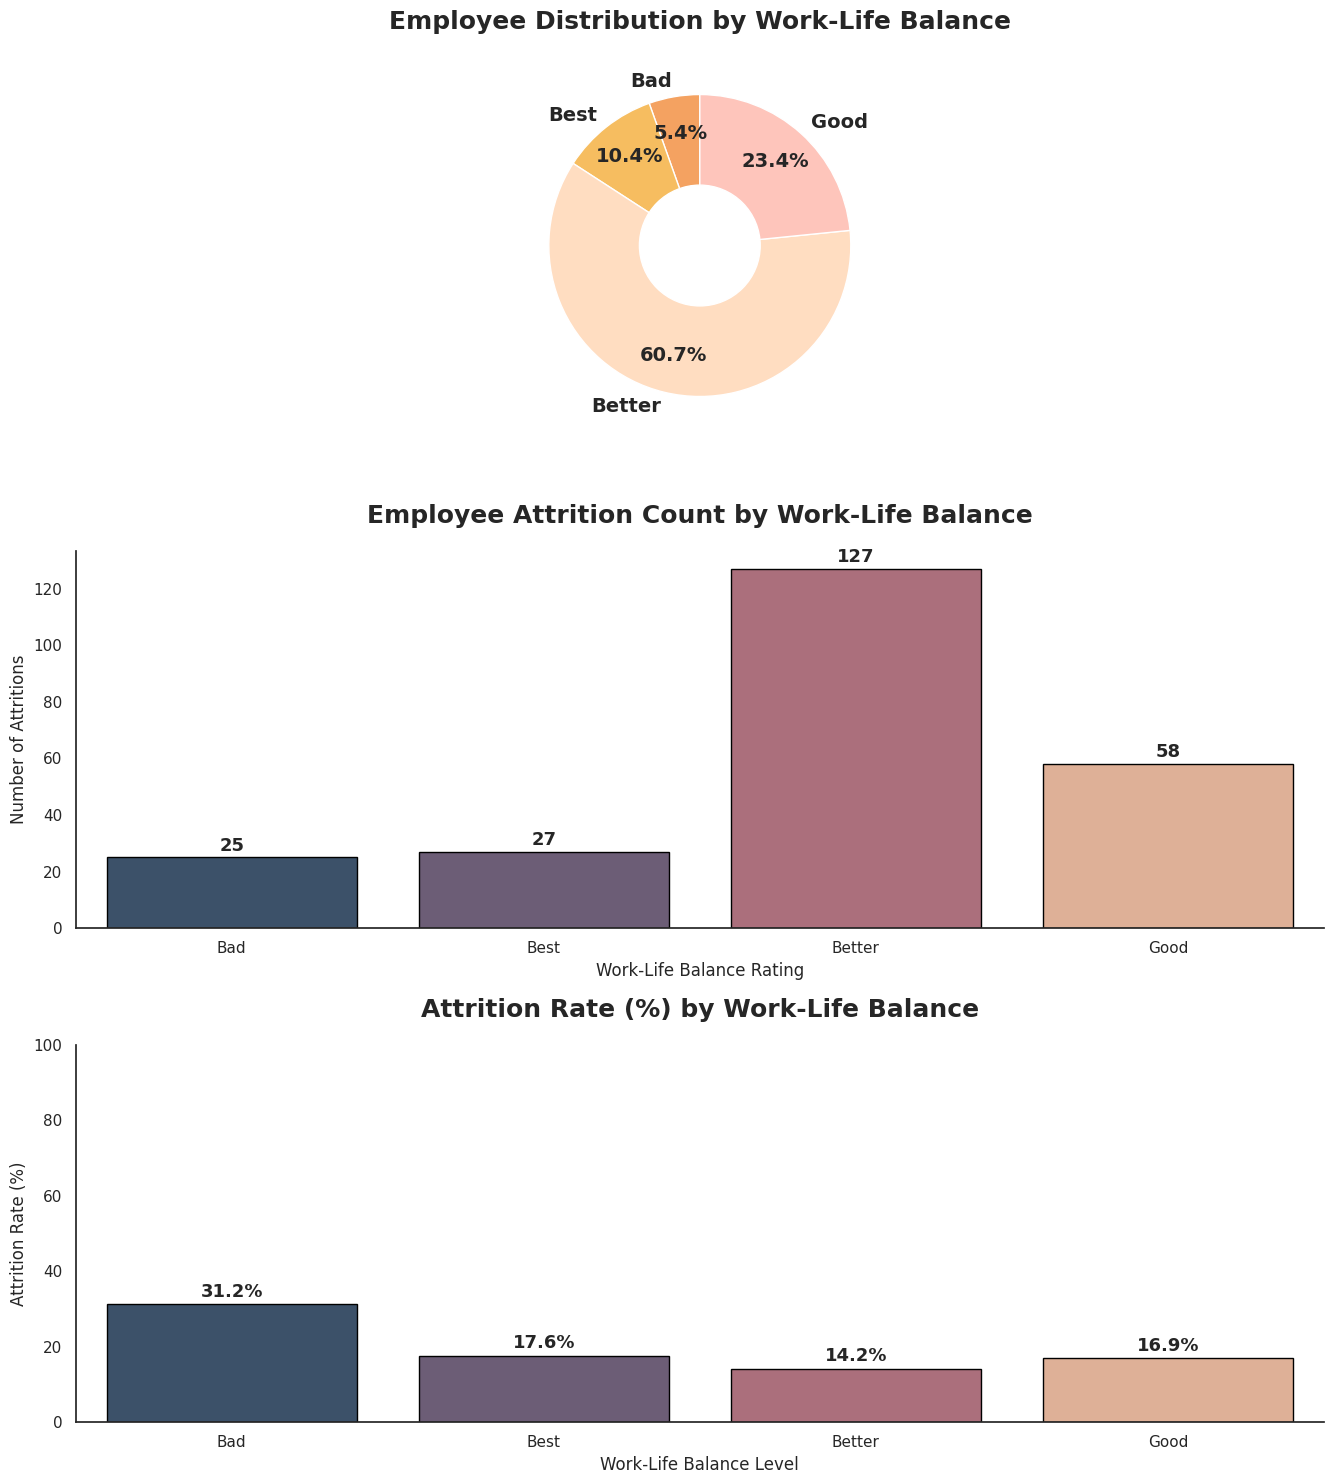

In [ ]:
# Set figure size for the plots
plt.figure(figsize=(13.5, 15))

# Subplot 1: Donut Chart - Employee Distribution by Work-Life Balance
plt.subplot(3, 1, 1)
wlb_counts = df["WorkLifeBalance"].value_counts().sort_index()

# Customizing color palette for satisfaction levels
colors = ['#F4A261', '#F6BD60', '#FFDDC1', '#FEC5BB']

# Pie chart with a white center for donut style
plt.pie(
    wlb_counts.values,
    labels=wlb_counts.index,
    autopct="%.1f%%",
    startangle=90,
    pctdistance=0.75,
    textprops={"fontweight": "bold", "fontsize": 14},
    colors=colors
)

# Adding a white circle in the center
center_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(center_circle)

plt.title("Employee Distribution by Work-Life Balance", fontsize=18, fontweight="bold", pad=20)

# Subplot 2: Attrition Count by Work-Life Balance
plt.subplot(3, 1, 2)

# Filtering for employees who left
attrited_df = df[df["Attrition"] == "Yes"]
wlb_attrition_counts = attrited_df["WorkLifeBalance"].value_counts().sort_index()

# Customizing palette for the bar plot
attrition_palette = ["#355070", "#6D597A", "#B56576", "#EAAC8B"]

# Creating the bar plot
ax = sns.barplot(
    x=wlb_attrition_counts.index,
    y=wlb_attrition_counts.values,
    order=wlb_attrition_counts.index,
    palette=attrition_palette,
    edgecolor='black'  # Adding edge to bars for clarity
)

# Removing gridlines from the second plot
ax.grid(False)

# Annotating each bar with count
for i, val in enumerate(wlb_attrition_counts.values):
    plt.text(i, val + 1, str(val), ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Employee Attrition Count by Work-Life Balance", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Work-Life Balance Rating")
plt.ylabel("Number of Attritions")

# Subplot 3: Attrition Rate (%) by Work-Life Balance
plt.subplot(3, 1, 3)

# Calculate attrition rate (handling division by zero)
attrition_rate = (wlb_attrition_counts / wlb_counts * 100).fillna(0).round(1)

# Plotting the attrition rate as a separate bar chart
sns.barplot(
    x=attrition_rate.index,
    y=attrition_rate.values,
    palette=attrition_palette,
    edgecolor='black'  # Adding edge to bars for clarity
)

# Annotating each bar with attrition rate percentage
for i, rate in enumerate(attrition_rate.values):
    plt.text(i, rate + 1, f"{rate}%", ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Attrition Rate (%) by Work-Life Balance", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Work-Life Balance Level")
plt.ylabel("Attrition Rate (%)")
plt.ylim(0, 100)

# Final layout adjustments
plt.tight_layout()
sns.despine()
plt.show()


The visualizations above provide a clear analysis of employee distribution and attrition based on work-life balance. The first plot, a donut chart, shows the distribution of employees across different work-life balance levels, where the majority (60.7%) report a "Better" balance. "Good" and "Very Good" categories account for 23.4% and 31.2%, respectively, while a small portion, 5.4%, report a "Bad" work-life balance. This highlights that a significant proportion of employees are satisfied with their work-life balance.

The second plot, which is a bar chart, displays the attrition count across the work-life balance categories. Notably, the "Better" category shows the highest attrition count (127), followed by "Good" (58), "Bad" (25), and "Best" (27). The higher attrition count in the "Better" category may suggest that employees are leaving even with an average work-life balance, perhaps due to other factors.

The final plot showcases the attrition rate for each work-life balance category. The "Bad" work-life balance group has the highest attrition rate of 31.2%, indicating that poor work-life balance is strongly linked to higher turnover. Employees in the "Good" category have an attrition rate of 16.9%, which is lower but still notable. "Best" and "Better" categories show lower rates at 17.6% and 14.2%, respectively, reflecting a more stable workforce in these groups. These findings suggest that a lack of work-life balance may be a key driver of attrition, while a better balance may contribute to greater retention.

**14 - Analyzing Employee Attrition by Years with Current Manager**

**Question: Are managers a reason of people resigning?**



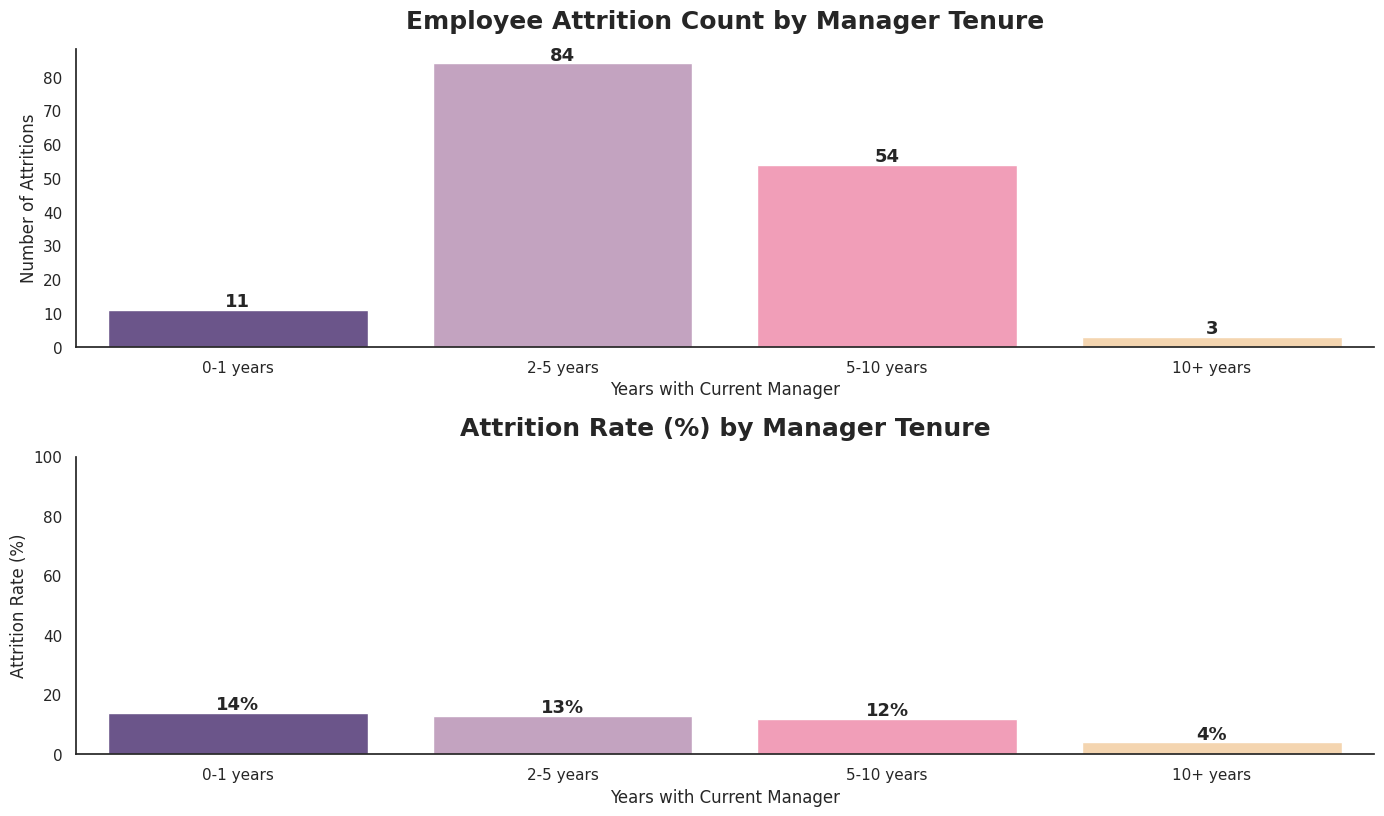

In [ ]:
# Categorizing employees by tenure with current manager
tenure_bins = [0, 1, 5, 10, 20]
tenure_labels = ['0-1 years', '2-5 years', '5-10 years', '10+ years']

# Applying binning
df["ManagerTenureGroup"] = pd.cut(df["YearsWithCurrManager"], bins=tenure_bins, labels=tenure_labels)

# Set figure size for the plots
plt.figure(figsize=(14, 12))
tenure_counts = df["ManagerTenureGroup"].value_counts().sort_index()

# Subplot 1: Attrition Count by Manager Tenure
plt.subplot(3, 1, 2)

# Filtering for employees who left
attrited_df = df[df["Attrition"] == "Yes"]
attrition_counts = attrited_df["ManagerTenureGroup"].value_counts().sort_index()

# Defining the color palette
bar_colors = ['#6A4C93', '#C89EC4', '#FF90B3', '#FFD6A5']

bar_plot = sns.barplot(
    x=attrition_counts.index,
    y=attrition_counts.values,
    palette=bar_colors
)

# Annotating each bar with count
for i, val in enumerate(attrition_counts.values):
    plt.text(i, val + 1, str(val), ha="center", fontsize=13, fontweight="bold")

plt.title("Employee Attrition Count by Manager Tenure", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Years with Current Manager")
plt.ylabel("Number of Attritions")
bar_plot.grid(False)

# Subplot 2: Attrition Rate (%) by Manager Tenure
plt.subplot(3, 1, 3)

# Calculate attrition rate (handling division by zero)
attrition_pct = np.floor((attrition_counts / tenure_counts) * 100).fillna(0).astype(int).values

# Plotting the attrition rate as a separate bar chart
sns.barplot(
    x=attrition_counts.index,
    y=attrition_pct,
    palette=bar_colors
)

# Annotating each bar with attrition rate percentage
for i, rate in enumerate(attrition_pct):
    plt.text(i, rate + 1, f"{rate}%", ha="center", fontsize=13, fontweight="bold")

plt.title("Attrition Rate (%) by Manager Tenure", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Years with Current Manager")
plt.ylabel("Attrition Rate (%)")
plt.ylim(0, 100)

# Final layout adjustments
plt.tight_layout()
sns.despine()
plt.show()


The visualizations above provide a detailed look at employee attrition in relation to their tenure with the current manager. The top plot, a bar chart, shows the distribution of attrition counts across different tenure categories. Employees with 2-5 years of tenure with their current manager have the highest attrition count (84 employees), followed by those with 5-10 years of tenure (54 employees), while employees with 0-1 years of tenure have a significantly lower attrition count of 11. The 10+ years tenure group has the least number of attritions, with only 3 employees. This suggests that attrition is most prevalent among employees with a moderate level of experience in their current role, particularly those with 2-5 years of tenure.

The second plot, a bar chart depicting attrition rates by manager tenure, shows the attrition percentage for each tenure group. While the number of attritions for employees with 2-5 years of tenure is the highest, their attrition rate (13%) is not the highest. The highest attrition rate is observed in the 0-1 years category, with 14% of employees leaving within their first year of working with the manager. The attrition rate drops slightly for employees with 2-5 years (13%) and 5-10 years (12%) of tenure, and it is lowest for those with 10+ years of tenure, at 4%. This highlights that employees with shorter tenures are more likely to leave their jobs, and attrition rates generally decrease as employees spend more time with their current manager. These findings suggest that onboarding, early engagement, and support could be crucial factors in reducing attrition in the initial years with the manager.

**15- Analyzing Employee Attrition by Years Since Last Promotion**

**Question: Does a lack of recent promotion contribute to higher employee attrition?**

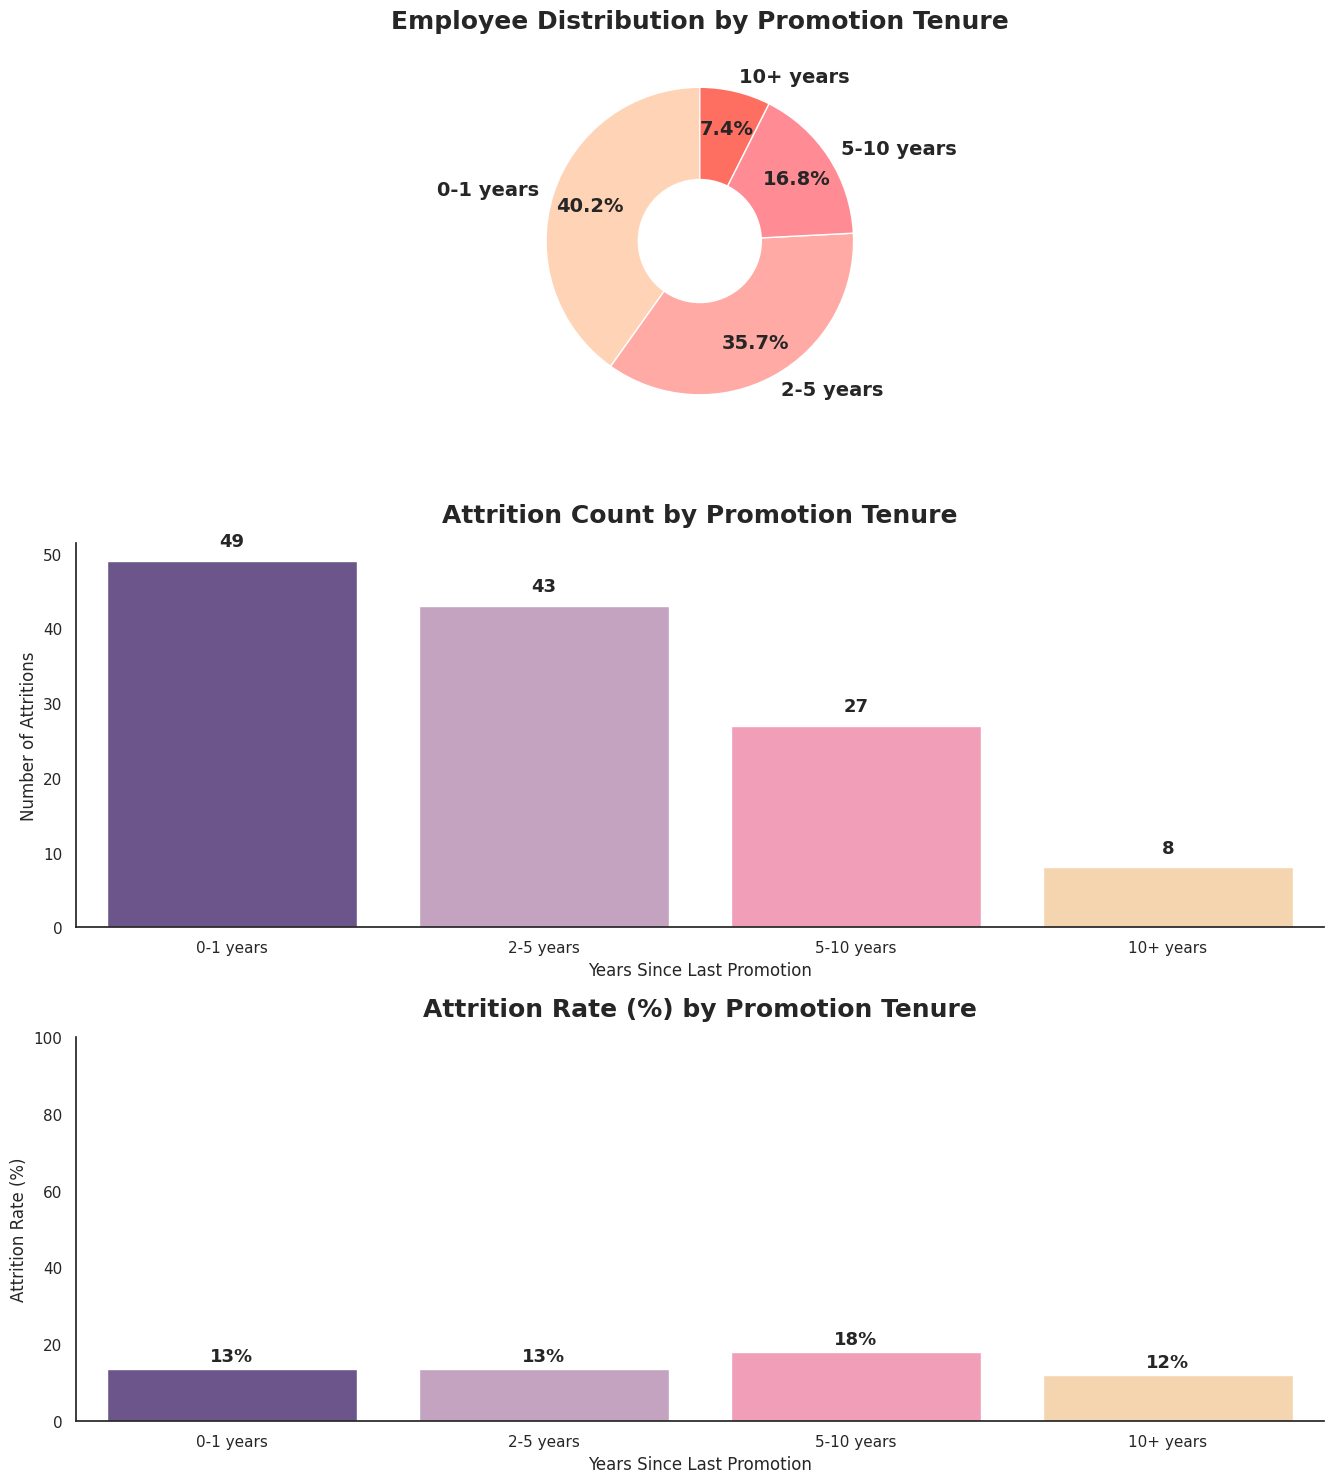

In [ ]:
# Defining bins and labels for grouping 'Years Since Last Promotion'
promotion_bins = [0, 1, 5, 10, 20]
promotion_labels = ['0-1 years', '2-5 years', '5-10 years', '10+ years']

# Grouping the data into defined promotion intervals
df["PromotionTenureGroup"] = pd.cut(df["YearsSinceLastPromotion"], bins=promotion_bins, labels=promotion_labels)

# Set figure size for the plots
plt.figure(figsize=(13.5, 15))

# Subplot 1: Donut Chart - Employee Distribution by Promotion Tenure
plt.subplot(3, 1, 1)
distribution = df["PromotionTenureGroup"].value_counts().sort_index()

# Color palette for the pie chart
donut_colors = ['#FFD3B6', '#FFAAA5', '#FF8C94', '#FF6F61']

# Pie chart with a white center for donut style
plt.pie(
    distribution.values,
    labels=distribution.index,
    autopct="%.1f%%",
    pctdistance=0.75,
    startangle=90,
    colors=donut_colors,
    textprops={"fontweight": "bold", "fontsize": 14}
)
center_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(center_circle)
plt.title("Employee Distribution by Promotion Tenure", fontsize=18, fontweight="bold", pad=15)

# Subplot 2: Attrition Count by Promotion Tenure
plt.subplot(3, 1, 2)
attrition_data = df[df["Attrition"] == "Yes"]
attrition_counts = attrition_data["PromotionTenureGroup"].value_counts().sort_index()

# Customizing palette for the bar plot
attrition_palette = ['#6A4C93', '#C89EC4', '#FF90B3', '#FFD6A5']

sns.barplot(
    x=attrition_counts.index,
    y=attrition_counts.values,
    palette=attrition_palette
)

# Annotating each bar with count
for idx, value in enumerate(attrition_counts.values):
    plt.text(idx, value + 2, str(value), ha="center", fontsize=13, fontweight="bold")

plt.title("Attrition Count by Promotion Tenure", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Number of Attritions")

# Subplot 3: Attrition Rate (%) by Promotion Tenure
plt.subplot(3, 1, 3)
# Calculate the attrition percentage for each group
attrition_rate = (attrition_counts / distribution * 100).fillna(0).round(1)

# Plotting the attrition rate as a separate bar chart
sns.barplot(
    x=attrition_rate.index,
    y=attrition_rate.values,
    palette=attrition_palette
)

# Annotating each bar with attrition rate percentage
for idx, rate in enumerate(attrition_rate.values):
    plt.text(idx, rate + 2, f"{int(rate)}%", ha="center", fontsize=13, fontweight="bold")

plt.title("Attrition Rate (%) by Promotion Tenure", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Attrition Rate (%)")
plt.ylim(0, 100)

# Final layout adjustments
plt.tight_layout()
sns.despine()
plt.show()


The visualizations above provide insights into the relationship between promotion tenure and attrition rates within the organization. The top-left donut chart shows the distribution of employees based on the number of years since their last promotion. The largest portion of employees falls in the "0-1 years" category, comprising 40.2% of the workforce, followed by "2-5 years" (35.7%), "5-10 years" (16.8%), and a smaller fraction in the "10+ years" category (7.4%). This distribution highlights that most employees have received their last promotion within the past few years, suggesting a relatively recent promotion cycle.

The top-right bar chart displays the number of employee attritions across the promotion tenure categories. The "0-1 years" group has the highest number of attritions, with 49 employees leaving the organization, followed by the "2-5 years" category with 43 attritions. Employees in the "5-10 years" category account for 27 attritions, and the "10+ years" category has the lowest attrition count at 8. These results suggest that employees with shorter promotion tenures may be more likely to leave, indicating potential areas for further investigation into employee retention strategies for those recently promoted.

The bottom chart illustrates the attrition rate as a percentage across the promotion tenure categories. The "0-1 years" group has an attrition rate of 13%, while the "2-5 years" and "5-10 years" categories both show slightly higher attrition rates of 13% and 18%, respectively. The "10+ years" category has a relatively low attrition rate of 12%. These rates suggest that while employees in the "0-1 years" and "2-5 years" categories are leaving at a higher rate, those with longer tenures tend to have more stability. This indicates that retention strategies could be focused on employees in their early years post-promotion, where attrition risks are more pronounced.









**16- Analyzing Employee Attrition by Years in Current Role**

**Question: Does staying too long in the same role without progression increase the likelihood of employee attrition?**

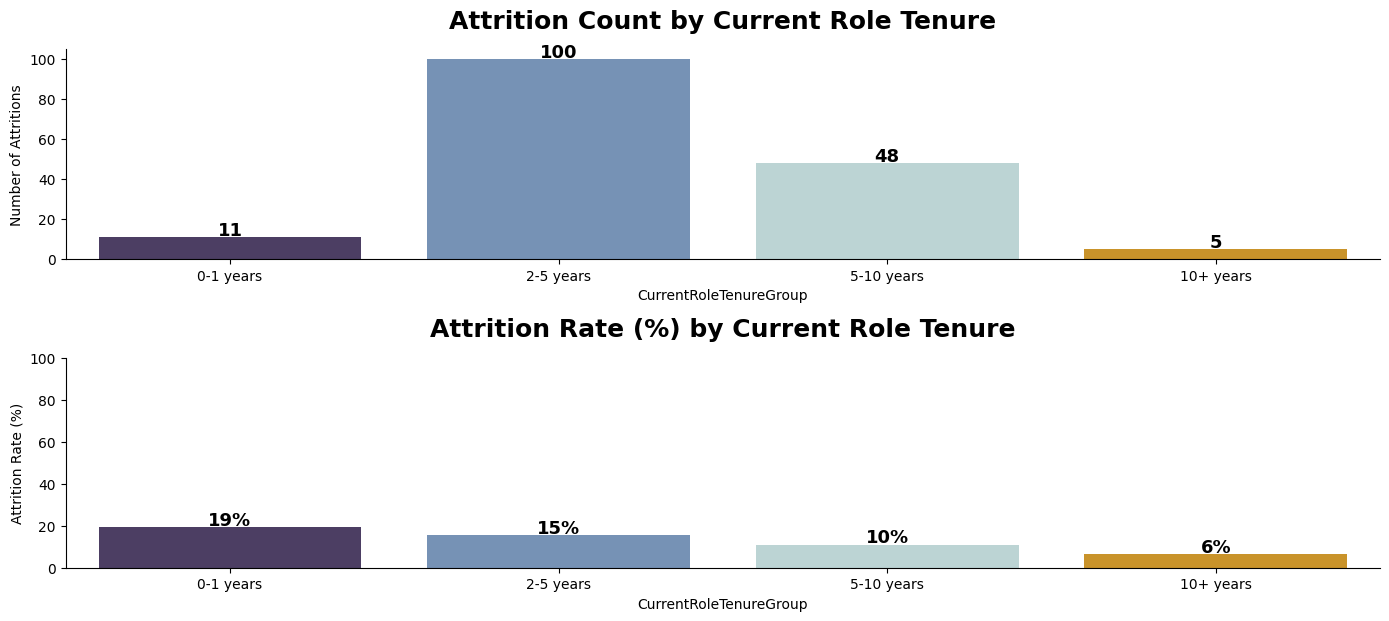

In [9]:
# Defining tenure bins and labels for categorizing employees based on tenure in current role
role_bins = [0, 1, 5, 10, 20]
role_labels = ['0-1 years', '2-5 years', '5-10 years', '10+ years']

# Categorizing employees based on tenure in current role
df['CurrentRoleTenureGroup'] = pd.cut(df['YearsInCurrentRole'], bins=role_bins, labels=role_labels)

# Plotting employee distribution and attrition by role tenure
plt.figure(figsize=(14, 9))

# Subplot 1: Attrition count by tenure in current role
plt.subplot(3, 1, 2)
attrited_employees = df[df['Attrition'] == 'Yes']
attrition_counts = attrited_employees['CurrentRoleTenureGroup'].value_counts().sort_index()

# Total number of employees per tenure group (used for attrition rate calculation)
group_counts = df['CurrentRoleTenureGroup'].value_counts().sort_index()

# Plotting attrition count
sns.barplot(
    x=attrition_counts.index,
    y=attrition_counts.values,
    palette=["#4B3869", "#6C91BF", "#B8D8D8", "#E49B0F"]
)

# Annotating bars with count
for idx, val in enumerate(attrition_counts.values):
    plt.text(idx, val + 1, f"{val}", ha="center", fontsize=13, fontweight='bold')

plt.title("Attrition Count by Current Role Tenure", fontsize=18, fontweight="bold", pad=15)
plt.ylabel("Number of Attritions")

# Subplot 2: Attrition rate (%) by tenure in current role
plt.subplot(3, 1, 3)

# Calculate attrition rate for each tenure group (ensure no influence from age data)
attrition_rate = (attrition_counts / group_counts * 100).fillna(0).round(1)

# Plotting the attrition rate as a separate bar chart
sns.barplot(
    x=attrition_rate.index,
    y=attrition_rate.values,
    palette=["#4B3869", "#6C91BF", "#B8D8D8", "#E49B0F"]
)

# Annotating each bar with attrition rate percentage
for idx, rate in enumerate(attrition_rate.values):
    plt.text(idx, rate + 1, f"{int(rate)}%", ha="center", fontsize=13, fontweight='bold')

plt.title("Attrition Rate (%) by Current Role Tenure", fontsize=18, fontweight="bold", pad=15)
plt.ylabel("Attrition Rate (%)")
plt.ylim(0, 100)

# Final layout adjustments
plt.tight_layout()
sns.despine()
plt.show()


The visualizations above provide key insights into employee attrition across different tenure categories within the company. The first chart, titled "Attrition Count by Current Role Tenure," shows the number of employees who have left the company, categorized by their years of tenure in the current role. The highest attrition count is seen in the 2-5 years tenure group, with 100 employees leaving, followed by the 5-10 years group with 48 employees. The least attrition is observed in the 10+ years category, with only 5 employees leaving the company. The second chart, "Attrition Rate (%) by Current Role Tenure," displays the attrition rate as a percentage of employees who left relative to the total number of employees in each tenure group. The highest attrition rate is found among employees with 0-1 years of tenure, at 19%, suggesting that newly hired employees are more likely to leave. The rate then decreases for employees with 2-5 years (15%) and 5-10 years (10%) of tenure, with the lowest rate in the 10+ years group at just 6%, indicating greater stability as tenure increases.

The higher attrition rate of 19% among employees with 0-1 years of tenure suggests that new hires may face challenges in adjusting to the company. To address this, the company should consider improving its onboarding processes, offering mentorship programs, and setting clear expectations early on to increase retention during the initial phase. By providing a supportive and welcoming environment from the start, new employees may feel more engaged and connected to the company, which could reduce early attrition.

The significant attrition observed in the 2-5 years tenure group (100 employees) points to a critical area for improvement. Introducing career development programs, providing opportunities for skill growth, and establishing clear career progression paths could help retain employees in this group. Additionally, fostering a culture of recognition and support would make employees feel valued and motivated to stay, especially during these formative years when many assess their long-term career prospects.

Employees with 10+ years of tenure display the lowest attrition rate, indicating a high level of loyalty and stability within this group. To maintain their engagement and commitment, the company should continue to offer professional challenges, career advancement opportunities, and competitive compensation. Regular check-ins, along with recognition for long-term contributions, can help keep these employees satisfied and prevent them from seeking opportunities elsewhere. By sustaining a positive work environment and promoting ongoing professional development, the company can ensure that long-tenured employees continue to thrive and feel valued.

By focusing on enhancing retention strategies for new hires and employees in the 2-5 years tenure group, while maintaining strong support for long-term employees, the company can effectively manage and reduce overall attrition rates.









**17- Analyzing Employee Attrition by Years At Company**

**Question : Does the length of time an employee has spent at the company influence their decision to leave?**

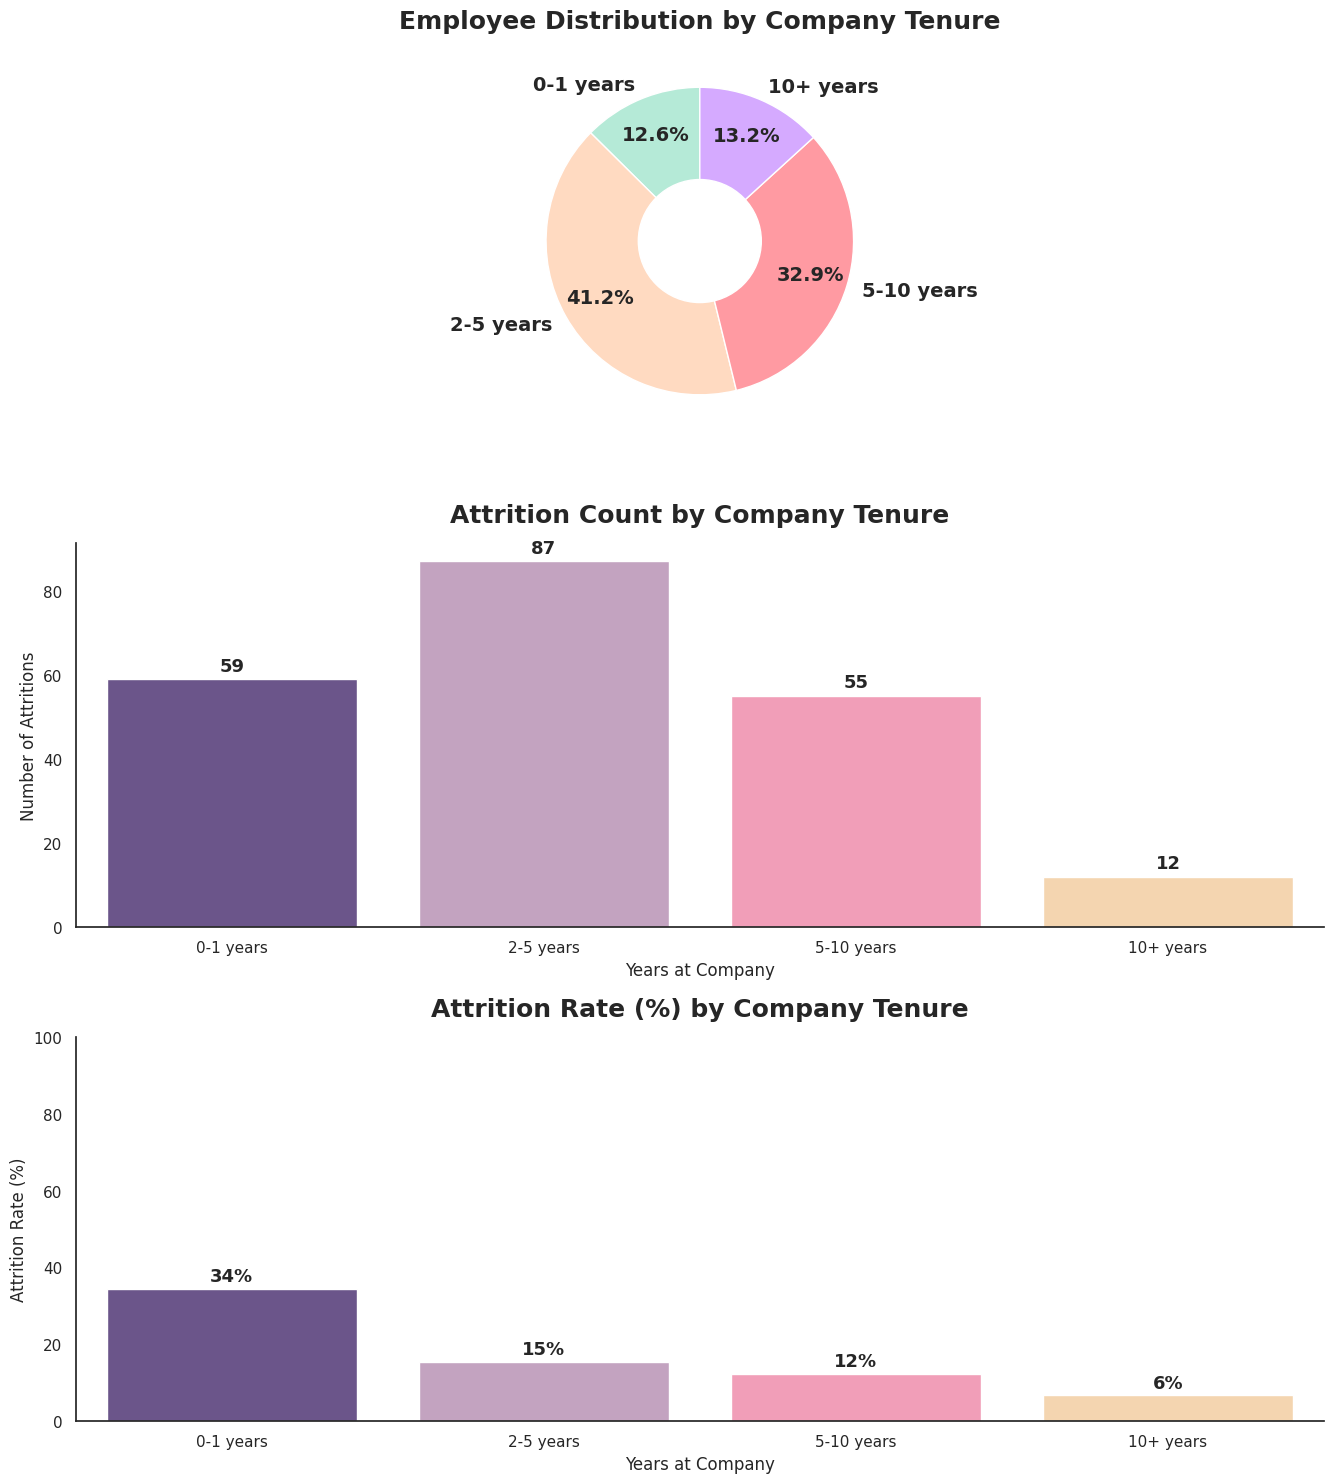

In [ ]:
# Defining bins and labels for grouping 'YearsAtCompany'
bins = [0, 1, 5, 10, 20]
labels = ['0-1 years', '2-5 years', '5-10 years', '10+ years']

# Grouping the data into defined experience intervals
df["YearsAtCompanyGroup"] = pd.cut(df["YearsAtCompany"], bins=bins, labels=labels)

# Set figure size for the plots
plt.figure(figsize=(13.5, 15))

# Subplot 1: Donut Chart - Employee Distribution by Company Tenure
plt.subplot(3, 1, 1)
employee_counts = df["YearsAtCompanyGroup"].value_counts().sort_index()

# Customizing color palette for the pie chart
donut_colors = ['#B5EAD7', '#FFDAC1', '#FF9AA2', '#D5AAFF']

# Creating the pie chart with a white center for donut style
plt.pie(
    employee_counts.values,
    labels=employee_counts.index,
    autopct="%.1f%%",
    pctdistance=0.75,
    startangle=90,
    colors=donut_colors,
    textprops={"fontweight": "bold", "fontsize": 14}
)

# Adding a white circle to create a donut chart
center_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(center_circle)
plt.title("Employee Distribution by Company Tenure", fontsize=18, fontweight="bold", pad=15)

# Subplot 2: Attrition Count by Company Tenure
plt.subplot(3, 1, 2)

# Filtering dataset for employees who left
attrited_df = df[df["Attrition"] == "Yes"]
attrition_counts = attrited_df["YearsAtCompanyGroup"].value_counts().sort_index()

# Customizing palette for the bar plot
attrition_palette = ['#6A4C93', '#C89EC4', '#FF90B3', '#FFD6A5']

# Creating the bar plot
sns.barplot(
    x=attrition_counts.index,
    y=attrition_counts.values,
    palette=attrition_palette
)

# Annotating each bar with count
for idx, value in enumerate(attrition_counts.values):
    plt.text(idx, value + 2, str(value), ha="center", fontsize=13, fontweight="bold")

plt.title("Attrition Count by Company Tenure", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Years at Company")
plt.ylabel("Number of Attritions")

# Subplot 3: Attrition Rate (%) by Company Tenure
plt.subplot(3, 1, 3)

# Calculating attrition rate: attrition / total employees at each level
attrition_rate = (attrition_counts / employee_counts * 100).fillna(0).round(1)

# Plotting the attrition rate as a separate bar chart
sns.barplot(
    x=attrition_rate.index,
    y=attrition_rate.values,
    palette=attrition_palette
)

# Annotating each bar with attrition rate percentage
for idx, rate in enumerate(attrition_rate.values):
    plt.text(idx, rate + 2, f"{int(rate)}%", ha="center", fontsize=13, fontweight="bold")

plt.title("Attrition Rate (%) by Company Tenure", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Years at Company")
plt.ylabel("Attrition Rate (%)")
plt.ylim(0, 100)

# Final layout adjustments
plt.tight_layout()
sns.despine()
plt.show()


The plots above provide insights into employee attrition by tenure at the company. The first plot, "Employee Distribution by Company Tenure," presents a donut chart showing the proportion of employees in various tenure categories. The largest group of employees has 2-5 years of tenure, comprising 41.2% of the workforce, followed by those with 5-10 years at 32.9%, and 10+ years at 13.2%. The smallest group consists of employees with 0-1 years of tenure, accounting for 12.6%. This distribution suggests that a significant portion of the workforce is relatively new or has spent fewer years at the company, while the number of employees in the more experienced categories diminishes.

The second plot, "Employee Attrition Count by Company Tenure," presents a bar chart of the number of employees who left the company, categorized by their years of tenure. The highest attrition count occurs in the 2-5 years group (87 employees), followed by the 5-10 years group (55 employees). Attrition in the 0-1 years category is lower (59 employees), while the 10+ years group has the least number of attritions (12 employees).

The third plot, "Attrition Rate (%) by Company Tenure," displays the attrition rate as a percentage of the total number of employees in each tenure group. The highest attrition rate is seen in the 0-1 years category (34%), indicating that newly hired employees are more likely to leave early in their tenure. The attrition rate decreases as tenure increases, with the 2-5 years group at 15%, the 5-10 years group at 12%, and the 10+ years group having the lowest attrition rate at 6%.

These findings suggest that while newer employees may be more likely to leave the company, the likelihood of attrition decreases as employees gain more experience within the organization. Recommendations include focusing retention efforts on the 0-1 and 2-5 years groups to reduce turnover early in employees' careers, while leveraging the stability of more tenured employees for leadership and mentorship roles.









**18 - Analyzing Employee Attrition by Total Working Experience**

**Question : Is lack of overall work experience contributing to higher employee attrition?**

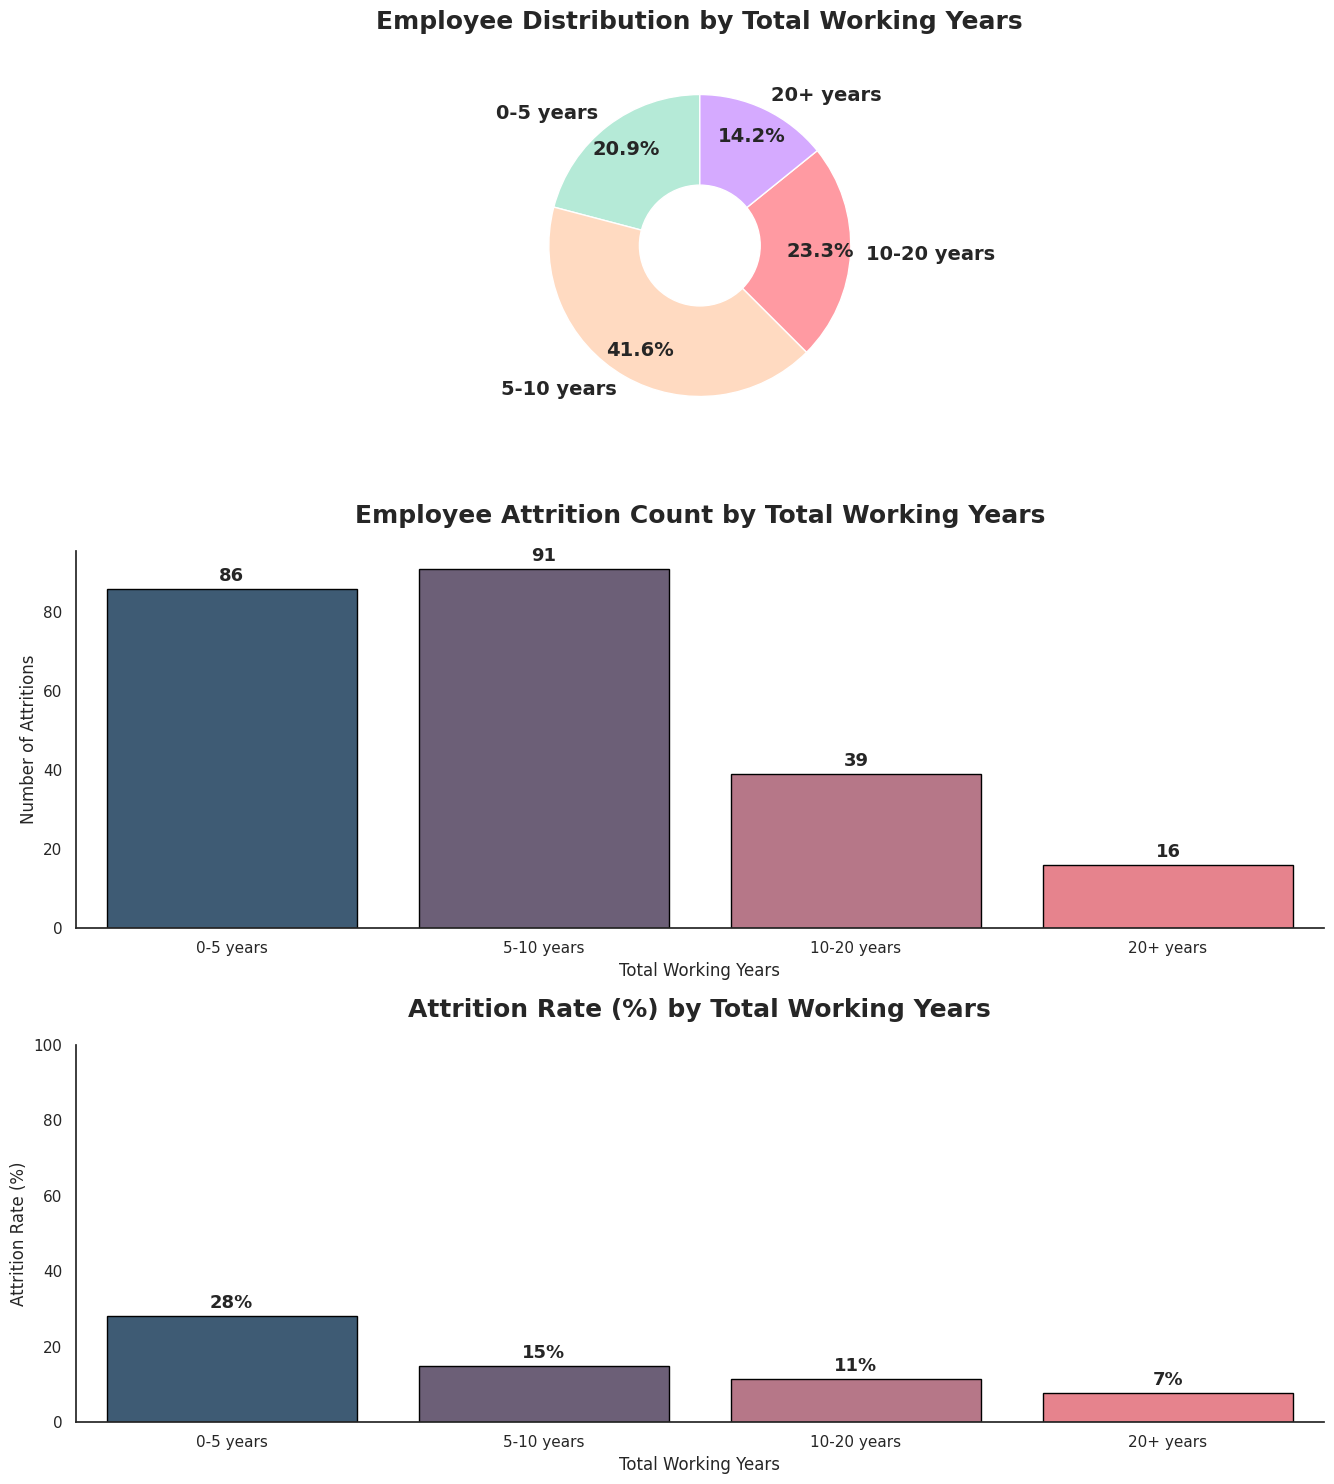

In [ ]:
# Categorizing 'TotalWorkingYears' into defined experience brackets
experience_bins = [0, 5, 10, 20, 50]
experience_labels = ['0-5 years', '5-10 years', '10-20 years', '20+ years']
df["WorkingExperienceGroup"] = pd.cut(df['TotalWorkingYears'],
                                      bins=experience_bins,
                                      labels=experience_labels)

# Set figure size for the plots
plt.figure(figsize=(13.5, 15))

# Subplot 1: Donut Chart - Employee Distribution by Total Working Years
plt.subplot(3, 1, 1)
experience_counts = df["WorkingExperienceGroup"].value_counts().sort_index()

# Customizing color palette for the pie chart
experience_colors = ['#B5EAD7', '#FFDAC1', '#FF9AA2', '#D5AAFF']

# Creating the pie chart
plt.pie(
    experience_counts.values,
    labels=experience_counts.index,
    autopct="%.1f%%",
    pctdistance=0.8,
    startangle=90,
    colors=experience_colors,
    textprops={"fontsize": 14, "fontweight": "bold"}
)

# Adding a white circle to create a donut chart
center_circle = plt.Circle((0, 0), 0.4, color='white')
plt.gca().add_artist(center_circle)

plt.title("Employee Distribution by Total Working Years", fontsize=18, fontweight="bold", pad=20)

# Subplot 2: Attrition Count by Total Working Years
plt.subplot(3, 1, 2)

# Filtering dataset for employees who left
attrited_df = df[df["Attrition"] == "Yes"]
attrition_counts = attrited_df["WorkingExperienceGroup"].value_counts().sort_index()

# Customizing palette for the bar plot
attrition_palette = ['#355C7D', '#6C5B7B', '#C06C84', '#F67280']

# Creating the bar plot
sns.barplot(
    x=attrition_counts.index,
    y=attrition_counts.values,
    order=attrition_counts.index,
    palette=attrition_palette,
    edgecolor='black'  # Adding edge to bars for clarity
)

# Annotating each bar with count
for i, count in enumerate(attrition_counts.values):
    plt.text(i, count + 1, str(count), ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Employee Attrition Count by Total Working Years", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Total Working Years")
plt.ylabel("Number of Attritions")

# Subplot 3: Attrition Rate (%) by Total Working Years
plt.subplot(3, 1, 3)

# Calculating attrition rate: attrition / total employees at each level
attrition_rate = (attrition_counts / experience_counts * 100).fillna(0).round(1)

# Plotting the attrition rate as a separate bar chart
sns.barplot(
    x=attrition_rate.index,
    y=attrition_rate.values,
    order=attrition_rate.index,
    palette=attrition_palette,
    edgecolor='black'  # Adding edge to bars for clarity
)

# Annotating each bar with attrition rate percentage
for i, rate in enumerate(attrition_rate.values):
    plt.text(i, rate + 1, f"{int(rate)}%", ha="center", va="bottom", fontsize=13, fontweight="bold")

plt.title("Attrition Rate (%) by Total Working Years", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Total Working Years")
plt.ylabel("Attrition Rate (%)")
plt.ylim(0, 100)

# Final layout adjustments
plt.tight_layout()
sns.despine()
plt.show()


The plots provide a comprehensive analysis of employee attrition based on total working years. The first plot, titled "Employee Distribution by Total Working Years," presents the distribution of employees across different experience groups. The majority of employees fall into the "5-10 years" experience bracket, which accounts for 41.6% of the workforce. The "10-20 years" group represents 23.3%, while 20.9% of employees have 0-5 years of experience, and the smallest group, those with 20+ years, comprises only 14.2% of the total workforce.

The second plot, "Employee Attrition Count by Total Working Years," displays the number of employees who left the company, segmented by their total years of experience. The highest attrition is observed among employees with 5-10 years of experience, totaling 91 employees, followed by those with 0-5 years (86 employees) and 10-20 years (39 employees). The smallest number of attritions occurred among employees with 20+ years of experience, with only 16 employees leaving the company.

The third plot, "Attrition Rate (%) by Total Working Years," highlights the attrition rate as a percentage of employees within each experience group. The attrition rate is highest among employees with 0-5 years of experience, at 28%, indicating a higher likelihood of new employees leaving the company. The attrition rate decreases as experience increases, with the 5-10 years group having a rate of 15%, the 10-20 years group at 11%, and the lowest rate of 7% observed among employees with 20+ years of experience. This suggests that employees with longer tenures at the company are less likely to leave, reflecting greater job stability and satisfaction as employees accumulate more experience.

In conclusion, the analysis reveals that while the highest number of attritions occurs in the 5-10 years experience group, newer employees (0-5 years) exhibit a higher attrition rate. To retain talent, especially among newer employees, it may be beneficial to focus on improving job satisfaction and career development opportunities for this group.